<h1><center>Shill Bidding Dataset</center></h1>

<h1><center>Data Preparation and Machine Learning</center></h1>



# Licence

Ahmad Alzahrani and Samira Sadaoui
alzah234 '@' uregina.ca and sadaouis '@' uregina.ca
Department of Computer Science
University of Regina
Regina, SK, CANADA, S4S 0A2


## Attribute Information:

Record ID: Unique identifier of a record in the dataset  

Auction ID: Unique identifier of an auction  

Bidder ID: Unique identifier of a bidder  

Bidder Tendency: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice  

Bidding Ratio: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants  

Successive Outbidding: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments  

Last Bidding: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction  

Auction Bids: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions  

Auction Starting Price: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction  

Early Bidding: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users  

Winning Ratio: A shill bidder competes in many auctions but hardly wins any auctions  

Auction Duration: How long an auction lasted  

Class: 0 for normal behaviour bidding; 1 for otherwise (deviating from what is standard, normal, or expected) 


**The Data Dictionary / Attribution Information is essential in analyzing the data in this set**

# Libraries


import numpy as np 
import pandas as pd  
import seaborn as sns  
import matplotlib.pyplot as plt  
%matplotlib inline  
import plotly.graph_objects as go 


from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.preprocessing import OrdinalEncoder
import scipy.stats


from IPython.core.pylabtools import figsize    


from sklearn import preprocessing  
from sklearn import datasets  
from sklearn.decomposition import PCA 
from sklearn.neighbors import kneighbors_graph  
from sklearn.mixture import GaussianMixture  
from sklearn import mixture  
from sklearn.metrics import silhouette_score
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2  
from sklearn.feature_selection import SelectFromModel  
from sklearn.ensemble import RandomForestClassifier as rf  
from sklearn.preprocessing import StandardScaler, normalize  
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve  
from sklearn.datasets import make_blobs

from sklearn import svm  
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.linear_model import LinearRegression 
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.tree import DecisionTreeClassifier  
from sklearn.neural_network import MLPClassifier  
from sklearn.ensemble import RandomForestClassifier  

from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz




# Abstract

**We scraped a large number of eBay auctions of a popular product. After preprocessing the auction data, we build the SB dataset. The goal is to share the labelled SB dataset with the researchers**



# Introduction 

**This dataset is formulated on shill bidding from ebay of a popular product.  It contains bids from a number of bidder accounts and the aim of this report is to present the researchers to predict future bids**

**Shill bidding is when a seller enters a bid on his or her own auction item with the purpose of inflating the winning bid. This can be done by the seller directly, or by a third party working along with the seller to submit false bids on the seller's behalf** <cite id="0zqlh">(Majadi et al., 2017)</cite>  **Shill bidding is problematic for ebay as it harms the buyer's surplus** <cite id="9wdvn">(Ingebretsen Carlson & Wu, 2022)</cite> **and therefore buyers revert to an alternative platform**

**The data dictionary is essential in determining the approach in terms of cleaning the data, which features are provding the information we need and what the data is tell us.  For example, the Bidder Tendency participates in auctions of a few sellers but bidding ratio is higher amongst shill bidders for the very reason of raising a bid price.  From aspects such as these it will help determine how features belong to values in the class feature, which is our target variable**

**I am approaching this as a classification problem as the target variable is what needs to be predicted and it's divided into different classes**
    


In [1]:

import warnings
warnings.filterwarnings('ignore')

# Data Preparation

## Exploratory Data Analysis

In [2]:
# pip install dataprep

In [3]:
import numpy as np 
import pandas as pd 


import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go

In [4]:
df = pd.read_csv('Shill Bidding Dataset.csv')

In [5]:
df.head()

Record_ID  Auction_ID Bidder_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732     _***i         0.200000       0.400000   
1          2         732     g***r         0.024390       0.200000   
2          3         732     t***p         0.142857       0.200000   
3          4         732     7***n         0.100000       0.200000   
4          5         900     z***z         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  
0       0.000028       0.666667                 5      0  
1       0.013123       0.944444                 5      0  
2       0.003042       1.000000                 5      0  
3       0.097477       1.000000                 5      0  
4       0.001242       0.500000                 7      0

In [6]:
df.shape

(6321, 13)

**Structure: 6321 observations and 13 features**


In [7]:
df.describe()

Record_ID   Auction_ID  Bidder_Tendency  Bidding_Ratio  \
count   6321.000000  6321.000000      6321.000000    6321.000000   
mean    7535.829457  1241.388230         0.142541       0.127670   
std     4364.759137   735.770789         0.197084       0.131530   
min        1.000000     5.000000         0.000000       0.011765   
25%     3778.000000   589.000000         0.027027       0.043478   
50%     7591.000000  1246.000000         0.062500       0.083333   
75%    11277.000000  1867.000000         0.166667       0.166667   
max    15144.000000  2538.000000         1.000000       1.000000   

       Successive_Outbidding  Last_Bidding  Auction_Bids  \
count            6321.000000   6321.000000   6321.000000   
mean                0.103781      0.463119      0.231606   
std                 0.279698      0.380097      0.255252   
min                 0.000000      0.000000      0.000000   
25%                 0.000000      0.047928      0.000000   
50%                 0.000000      0.440937      0.142857   
75%                 0.000000      0.860363      0.454545   
max                 1.000000      0.999900      0.788235   

       Starting_Price_Average  Early_Bidding  Winning_Ratio  Auction_Duration  \
count             6321.000000    6321.000000    6321.000000       6321.000000   
mean                 0.472821       0.430683       0.367731          4.615093   
std                  0.489912       0.380785       0.436573          2.466629   
min                  0.000000       0.000000       0.000000          1.000000   
25%                  0.000000       0.026620       0.000000          3.000000   
50%                  0.000000       0.360104       0.000000          5.000000   
75%                  0.993593       0.826761       0.851852          7.000000   
max                  0.999935       0.999900       1.000000         10.000000   

             Class  
count  6321.000000  
mean      0.106787  
std       0.308867  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

**From the describe function I  I can see the mean, as a central measure of tendency, is of significant difference from the max values of certain features, namely 'Auction_Duration','Successive_Outbidding','Bidding_Ratio' and 'Bidder_Tendency'. I need to consider and visualize these for outliers in terms of data cleaning**

In [8]:
df.isnull().sum()

Record_ID                 0
Auction_ID                0
Bidder_ID                 0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
dtype: int64

**I can see there are no null values at this point**


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Record_ID               6321 non-null   int64  
 1   Auction_ID              6321 non-null   int64  
 2   Bidder_ID               6321 non-null   object 
 3   Bidder_Tendency         6321 non-null   float64
 4   Bidding_Ratio           6321 non-null   float64
 5   Successive_Outbidding   6321 non-null   float64
 6   Last_Bidding            6321 non-null   float64
 7   Auction_Bids            6321 non-null   float64
 8   Starting_Price_Average  6321 non-null   float64
 9   Early_Bidding           6321 non-null   float64
 10  Winning_Ratio           6321 non-null   float64
 11  Auction_Duration        6321 non-null   int64  
 12  Class                   6321 non-null   int64  
dtypes: float64(8), int64(4), object(1)
memory usage: 642.1+ KB


**I use info() to view feature datatypes to ensure related features are uniformed, and to give me insight into how I will clean and analyze the data. I also want to determine what information is communicated through values. For example, The 'Bidder_Id' is a categorical feature to identify Bidders.  Its concealed by delimiter values for privacy purposes. This will be dealt with appropriately to preserve integrity of the dataset** 

**I will first view the statistical distribution of bidders.  It is relevant in that a small number of bidders increases the probability of shill bidding, as a seller or someone acting on their behalf to artificially inflate the bidding price**<cite id="tyred">(Piper, 2012)</cite>

In [10]:
#from dataprep.eda import plot, plot_correlation, create_report, plot_missing
#plot(df)

**From initial observation, it is a moderate sized dataset, (6321, 13), With no null values. It is entirely numerical with the target variable being 'Class', representing the normal and abnormal bids. Data prep provides initial distribution of count and frequency of the features**

**I can also see there the ratio of normal to abnormal bids is distinct so I'll determine the exact distribution**

In [11]:
unique = df['Bidder_ID'].nunique()

In [12]:
total = df['Bidder_ID'].count()

In [13]:
unique_value = unique / total
unique_value

0.16674576807467173

**I can see that the ratio of bidders to bids is at 17%.  An distinct indication of shill bidders, which lend further weight that shill bidding is prevalent within the data** <cite id="sfmtj">(Piper, 2012)</cite>

**I'll now encode'Bidder_ID' so the analysis correctly assign the ID to the other features. I drop the old feature after**

In [14]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
df["Bidder_code"] = ord_enc.fit_transform(df[["Bidder_ID"]])
df[["Bidder_ID", "Bidder_code"]].head()

Bidder_ID  Bidder_code
0     _***i        302.0
1     g***r        513.0
2     t***p        908.0
3     7***n        234.0
4     z***z       1053.0

**Ordinal encoder is used for 'Bidder_ID' as it has no innate order or ranking and maintains the ordinal nature of the variable** <cite id="dnirg">(Cavin, 2022)</cite>

In [15]:
dfnew = df.drop(['Bidder_ID'], axis = 1)

In [16]:
dfnew.head()

Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732         0.200000       0.400000   
1          2         732         0.024390       0.200000   
2          3         732         0.142857       0.200000   
3          4         732         0.100000       0.200000   
4          5         900         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  Bidder_code  
0       0.000028       0.666667                 5      0        302.0  
1       0.013123       0.944444                 5      0        513.0  
2       0.003042       1.000000                 5      0        908.0  
3       0.097477       1.000000                 5      0        234.0  
4       0.001242       0.500000                 7      0       1053.0

In [17]:
min_value = dfnew['Auction_Duration'].min()
max_value = dfnew['Auction_Duration'].max()

# Print the results
print("Minimum value:", min_value)
print("Maximum value:", max_value)

Minimum value: 1
Maximum value: 10


**Here I can see the the bidding duration ranges from 1 to 10 days**

In [18]:
 dfnew.sort_values("Bidder_code")

Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
5950      14260         330         0.333333       0.055556   
3021       7205         311         0.333333       0.032258   
5249      12560         161         0.333333       0.043478   
1888       4516         899         0.000000       0.200000   
886        2062         224         1.000000       0.181818   
...         ...         ...              ...            ...   
2965       7062        1050         0.025641       0.041667   
4             5         900         0.051282       0.222222   
866        2020        1392         0.076923       0.300000   
2466       5863        1161         0.102564       0.190476   
5977      14312         762         0.025641       0.100000   

      Successive_Outbidding  Last_Bidding  Auction_Bids  \
5950                    0.0      0.269545      0.000000   
3021                    0.0      0.229077      0.419355   
5249                    0.0      0.577458      0.217391   
1888                    0.0      0.000016      0.000000   
886                     0.0      0.882151      0.000000   
...                     ...           ...           ...   
2965                    0.0      0.413368      0.250000   
4                       0.0      0.001318      0.000000   
866                     0.5      0.048026      0.000000   
2466                    0.5      0.177145      0.142857   
5977                    0.0      0.164062      0.000000   

      Starting_Price_Average  Early_Bidding  Winning_Ratio  Auction_Duration  \
5950                0.000000       0.269545            0.0                 7   
3021                0.000000       0.229077            0.0                 7   
5249                0.993593       0.577458            0.0                 3   
1888                0.000000       0.000016            1.0                 5   
886                 0.000000       0.723489            1.0                 7   
...                      ...            ...            ...               ...   
2965                0.000000       0.413368            0.0                 1   
4                   0.000000       0.001242            0.5                 7   
866                 0.000000       0.032302            0.5                 7   
2466                0.993528       0.015074            0.5                 7   
5977                0.000000       0.164062            0.5                 3   

      Class  Bidder_code  
5950      0          0.0  
3021      0          0.0  
5249      0          0.0  
1888      0          1.0  
886       0          2.0  
...     ...          ...  
2965      0       1053.0  
4         0       1053.0  
866       1       1053.0  
2466      1       1053.0  
5977      0       1053.0  

[6321 rows x 13 columns]

**I sort "Bidder_code" to see the encoding has worked correctly**

In [19]:
dfnew.head()

Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732         0.200000       0.400000   
1          2         732         0.024390       0.200000   
2          3         732         0.142857       0.200000   
3          4         732         0.100000       0.200000   
4          5         900         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  Bidder_code  
0       0.000028       0.666667                 5      0        302.0  
1       0.013123       0.944444                 5      0        513.0  
2       0.003042       1.000000                 5      0        908.0  
3       0.097477       1.000000                 5      0        234.0  
4       0.001242       0.500000                 7      0       1053.0

### EDA Roadmap

**In a classification problem, I need to consider how the Target Variable will be measured against the dataset for an accurate analysis. The remit being, to predict future bids in the form of shill bidding**

**Analyzing a dataset's skewness might help find potential problems with the data** <cite id="1vimr">(Gawali, 2021)</cite>

In [20]:
dfnew.skew(axis=0, skipna=True, numeric_only=None)

Record_ID                 0.005442
Auction_ID                0.045817
Bidder_Tendency           2.531213
Bidding_Ratio             2.421639
Successive_Outbidding     2.566110
Last_Bidding              0.087710
Auction_Bids              0.587272
Starting_Price_Average    0.086412
Early_Bidding             0.220419
Winning_Ratio             0.404189
Auction_Duration         -0.131373
Class                     2.546974
Bidder_code              -0.209123
dtype: float64

**Four features are positively skewed 'Bidder_Tendency', 'Bidding_Ratio', Successive_Outbidding' and 'Class'.  The other features are close to symmetric.  Visualising skewness helps understand data relationships and further interpretation but they need to be addressed as they can interfere with machine learning algorithms** <cite id="bvjg9">(Cheryl, 2020)</cite>

**I will now view the distribution of the target variable as, previously stated, it's relevant for the brief** 

In [21]:
# pip install bokeh

In [22]:
import plotly.express as px

df_counts = dfnew.groupby('Class').size().reset_index(name="count")

fig = px.bar(df_counts, x='Class', y='count', text='count',
             color='Class', color_discrete_sequence=['turquoise', 'red'])

fig.update_traces(texttemplate='%{text:.0f}', textposition='inside') # to display count on bars

fig.update_layout(title='Distribution of Class', xaxis_title='Value', yaxis_title='Total Count',
                 title_x=0.5, title_y=0.9, margin=dict(t=80))

fig.show()


**It's important to have a direct visual communication to what needs to be analysed  as design can be misleading in communication** <cite id="l0t1z">(TMS-Plugins & Jovanović, 2022)</cite>

**I chose a bar chart as people generally understand length in terms of values so it is a good method to communicate the different values and it's important not to oversaturate charts which leads to confusion** <cite id="9x4w9">(Amipara, 2019)</cite>



**I chose complimentary colours to visualise the distribution between the value counts of the target variable as the harmonies of the complimentary color is easier for the eye in considering the separation of the two**<cite id="01mvs">(Cisneros, 2020)</cite>
    
**I also chose to make the plot interactive as to communicate the data more effectively** <cite id="xzjop">(LinkedIn Data Management, 2023)</cite>
    
**I will however include another visualisation as it is effective in reaching a larger audience and can provide an insight perhaps not seen on bar charts**<cite id="hrqn3">(Amipara, 2019)</cite>

In [23]:
dfnew['Class'].value_counts()

0    5646
1     675
Name: Class, dtype: int64

In [24]:

normal = 5646
abnormal = 675
total = normal + abnormal 


# Calculate percentages
normal_percentage = (normal / total) * 100
abnormal_percentage = (abnormal / total) * 100

normal_percentage


89.32130991931656

In [25]:
abnormal_percentage

10.678690080683436

In [26]:
#pip install pywaffle

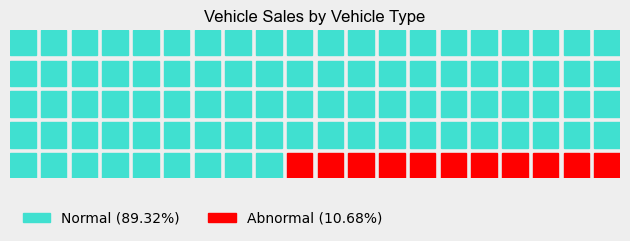

In [27]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

data = {'Normal': 89.32, 'Abnormal': 10.68}

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=data,
    colors=["#40E0D0", "#FF0000"],
    title={'label': 'Vehicle Sales by Vehicle Type', 'loc': 'center', 'fontname': 'Arial'},  # Centered title with 'Arial' font
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.4), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW',
    vertical=True,
    block_arranging_style='snake'
)

fig.set_facecolor('#EEEEEE')
plt.show()


<cite id="40bym">(Li, 2017/2023)</cite>
    
<cite id="yu68r">(Kosourova, 2021)</cite>
      
**I chose to view a waffle chart as a flat visualisation can be effective for direct understanding.  It's a good alternative to a pie chart and is a more pleasing and sophisticated view** <cite id="2yi14">(McDonald, 2023)</cite>

**This Visualization shows the percentage of abnormal bidding at 10.7%.  This helps determining relationships with other features for prediction** <cite id="qkpdj">(Srivastava, 2020)</cite>

**The color red is a good vibrant color to highlight the frauduant bids, red also being ominous is a good association**

## Visualising and dealing with outliers 

**I'm going to take the features that demonstrated skewness to understand how I will handle these as not to obstruct the integrity of the data overall**

**I will do this first by box plots to confirm or deny my theories**

In [28]:
#pip install cufflinks

In [29]:
#pip install plotly cufflinks

In [30]:
import pandas as pd
import plotly.express as px
import cufflinks as cf
cf.go_offline()

subset_df = dfnew[['Auction_Duration', 'Successive_Outbidding', 'Bidding_Ratio', 'Bidder_Tendency']]

fig = subset_df.iplot(kind='box', asFigure=True)
fig.update_layout(title='Boxplots of Features',
                  xaxis_title='Features',
                  yaxis_title='Values')
fig.show()





<font color = red> CITE The Next Level of Data Visualizations **Input explanation for this interactive code and why I box it together**

**From the above plots we can see there are outliers, and significant outliers in features 'Auction_Duration', 'Successive_Outbidding','Bidding_Ratio' and 'Bidder_Tendency'.  I will just look at 'Bidding_Ratio' and 'Bidder_Tendency' as they are numeric and 'Class' and 'Successive_Outbidding' refer to a classification**

**I chose an interactive box plot as these are difficult to read for a non techinical audience, it allows me to take the viewer through a story like journey of what exactly the data is telling us.  It is better at presenting insights and detail**

**I will do this by isolating the interquartile ranges and get a numeric value for the outliers**

In [31]:
numerical = ['Bidder_Tendency', 'Bidding_Ratio']

def detect_outliers(d):
  for i in d:
    Q3, Q1 = np.percentile(dfnew[i], [75 ,25])
    IQR = Q3 - Q1

    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR

    outliers = dfnew[i][(dfnew[i] > ul) | (dfnew[i] < ll)]
    print(f'*** {i} outlier points***', '\n', outliers, '\n')

In [32]:
detect_outliers(numerical)

*** Bidder_Tendency outlier points*** 
 6       0.400000
10      0.600000
11      0.500000
26      1.000000
29      1.000000
          ...   
6280    0.700000
6289    0.592593
6296    0.500000
6306    0.400000
6314    0.625000
Name: Bidder_Tendency, Length: 628, dtype: float64 

*** Bidding_Ratio outlier points*** 
 0       0.400000
7       0.444444
10      0.562500
23      0.714286
26      0.600000
          ...   
6266    0.500000
6278    0.357143
6285    0.740741
6289    0.615385
6293    0.500000
Name: Bidding_Ratio, Length: 430, dtype: float64 



**Viewing the results, I decided to use Winsorization as I am unsure as to the literal relevance of the values and want to retain observations that are at the extremes, However, I don't want to interpret them too strictly**<cite id="fu28l">(Zach, 2021)</cite>

**I chose a 5% cap to cut down on augmentation. This indicates that the function will substitute the next lowest and highest values for the values at the bottom and top 5% of the data, respectively. This is a technique for treating outliers that involves replacing the outlier's value with the closest value that is within the range.**

In [33]:
import scipy.stats
scipy.stats.mstats.winsorize(dfnew['Bidder_Tendency'], limits = 0.05)

masked_array(data=[0.2       , 0.02439024, 0.14285714, ..., 0.05555556,
                   0.07692308, 0.01639344],
             mask=False,
       fill_value=1e+20)

**I then took the 'Bidder_Tendency' to view the IQR to make ensure an accurate outcome**

In [34]:
Q1=dfnew["Bidder_Tendency"].quantile(0.25)
Q3=dfnew["Bidder_Tendency"].quantile(0.75)
IQR=Q3-Q1
print(Q1)
print(Q3)
print(IQR)
Lower = Q1 - 1.5*IQR
Upper = Q3+1.5*IQR
print(Lower, Upper)

0.027027027
0.166666667
0.13963963999999998
-0.18243243299999998 0.376126127


**I can use the above to treat outliers in 'Bidder_Tendency' and maintain accuracy**

In [35]:
for x in ['Bidder_Tendency']:
    q75,q25 = np.percentile(dfnew.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    dfnew.loc[dfnew[x] < min,x] = np.nan
    dfnew.loc[dfnew[x] > max,x] = np.nan

**Context is key in handling outliers in this feature.  A shill bidder only engages in auctions with a small number of sellers. Given that the shill bidder is probably collaborating with the fraudulent seller to artificially increase the price of the item, this is a collusive act involving the seller and an accomplice.** <cite id="ulp53">(Ingebretsen Carlson & Wu, 2022)</cite>**In this case can be aligned with Auction ID at a later stage.  Therefore, rather than removing outliers, I will replace values outside 0.27 with the mean value given the distribution, to maintain the integrity of the dataset**

In [36]:
mean = dfnew["Bidder_Tendency"].mean()
dfnew["Bidder_Tendency"].where(dfnew["Bidder_Tendency"] < 0.27, mean, inplace=True)


# Descriptive Statistics 

In [37]:
dfnew['Class'].map({0: 'Normal', 1: 'Fraudulent'})


0           Normal
1           Normal
2           Normal
3           Normal
4           Normal
           ...    
6316    Fraudulent
6317        Normal
6318        Normal
6319        Normal
6320        Normal
Name: Class, Length: 6321, dtype: object

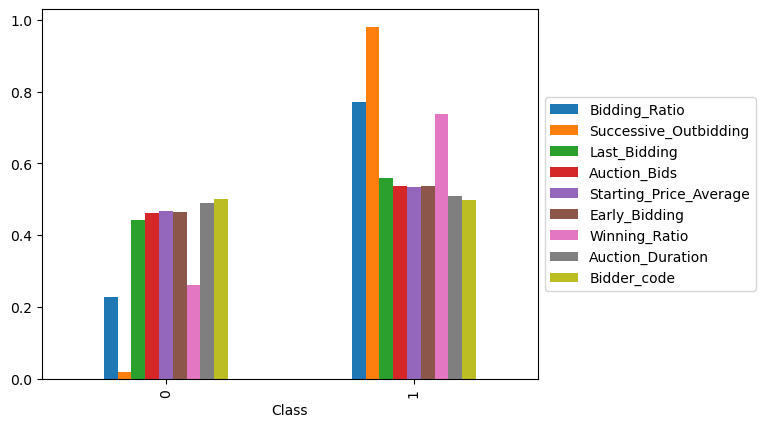

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

features = ['Bidding_Ratio', 'Successive_Outbidding', 'Last_Bidding', 'Auction_Bids', 'Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio', 'Auction_Duration', 'Bidder_code']
target = ['Class']
ratios = pd.DataFrame()

# Assuming 'descriptive' is your DataFrame
ratio_df = dfnew.groupby(target)[features].mean()  # Group by 'target' and calculate the mean of 'features'
ratio_df = ratio_df.div(ratio_df.sum())  # Divide each value by the sum of all values
ratios = ratio_df[features]  # Assign the calculated ratios to the 'ratios' DataFrame

# Visualize the ratios
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']
ax = ratios.plot.bar(color=colors)
ax.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()



Citation: This code was AI assisted 

**Here I can see the ratios of the features against the target variables.  It indicates a strong leaning for specific features to be more inclusive in abnormal bidding, being 'Bidding_Ratio', 'Successive_Outbidding' and 'Winning_Ratio'**

**This type of plot is perfect for the purpose of this remit, being that we want to understand the features that are telling us something about the fraudulant bids**  

**The colors can easily be matched from normal to abnormal bids and again, the lengths are excellent in highlighting the different variations in the ratios**

In [39]:
px.histogram(dfnew, x='Class', y='Auction_Duration', color='Successive_Outbidding',
             hover_name='Bidding_Ratio', marginal='rug', facet_col='Successive_Outbidding')


CITE:<cite id="ywq1i">(Plotly, 2023)</cite>

**This code from plotly express is excellent at defining the different distributions between the Class, Successive_Outbidding and Auction Duration.  Plotly express is an exccellent library so utilize for more depth in a plot, to tell a larger story.  It is clear that normal bids have the highest duration where there is no successive-outbidding and tells us that the duration for fraudulant outbidding is marginally higher**

**Plotly express allows me to have flexibility in what I want to communicate and flexibility in how i want to communicate it so this is a perfect choice to view these correlations**

In [40]:
Abnormal = (df['Class'] == 1).astype(int)


## Visualising Data for Feature selection 

**Feature selection is primarily focused on removing non-informative or redundant predictors from the model**<cite id="qcgng">(Brownlee, 2019)</cite>
    

**I will use correlation heatmap to visualise these features that will help towards machine learning accuracy**

**I will look at these from the dataset as a whole,  normal bidding and abnormal bidding**

In [41]:
df_clean =dfnew.corr()

In [42]:
df_norm = df_clean
df_abnorm = df_clean

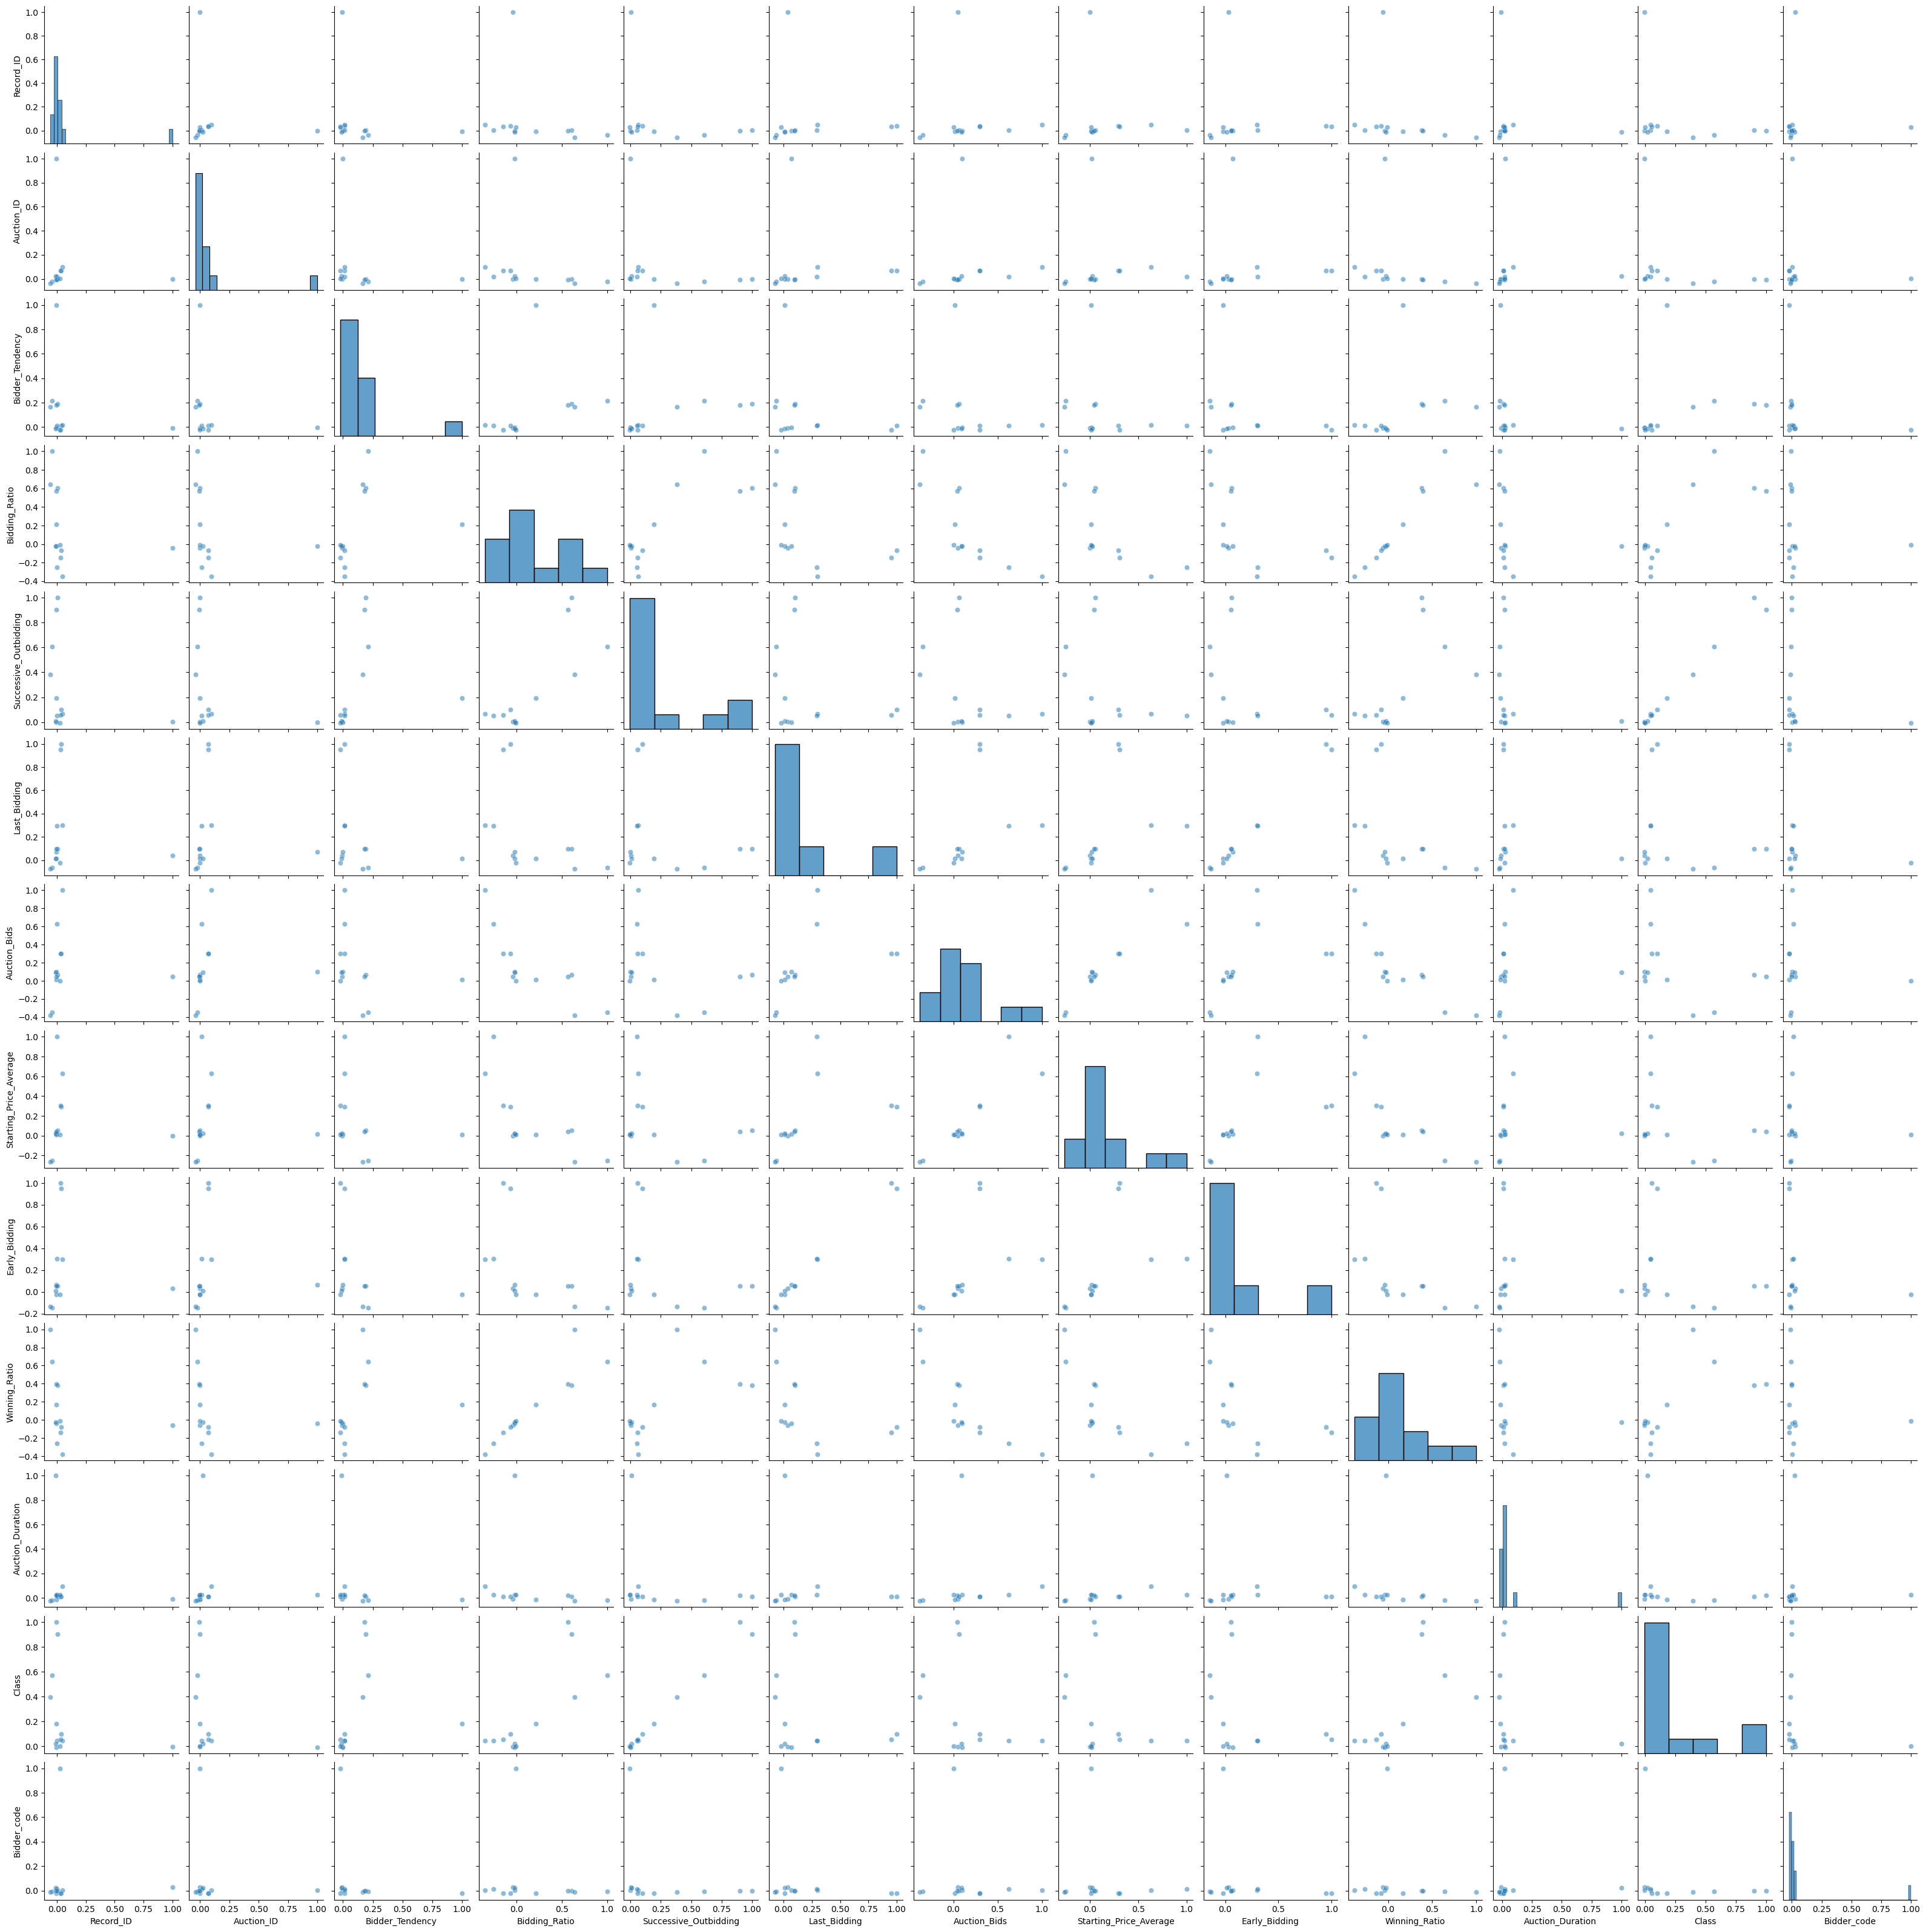

In [43]:
sns.pairplot(df_clean, diag_kind='hist', plot_kws={'alpha': 0.5}, diag_kws={'alpha': 0.7})

plt.show()

**I used a pairwise plot matrix to give me insight into relationships, pattern recognition, outliers and EDA** <cite id="dtkz5">(Rock Content Writer, 2012)</cite>


### Dataset Heatmap

In [44]:
mask = np.zeros_like(df_clean.corr())
triangle_indices = np.triu_indices_from(mask)
mask [triangle_indices] = True

<Axes: >

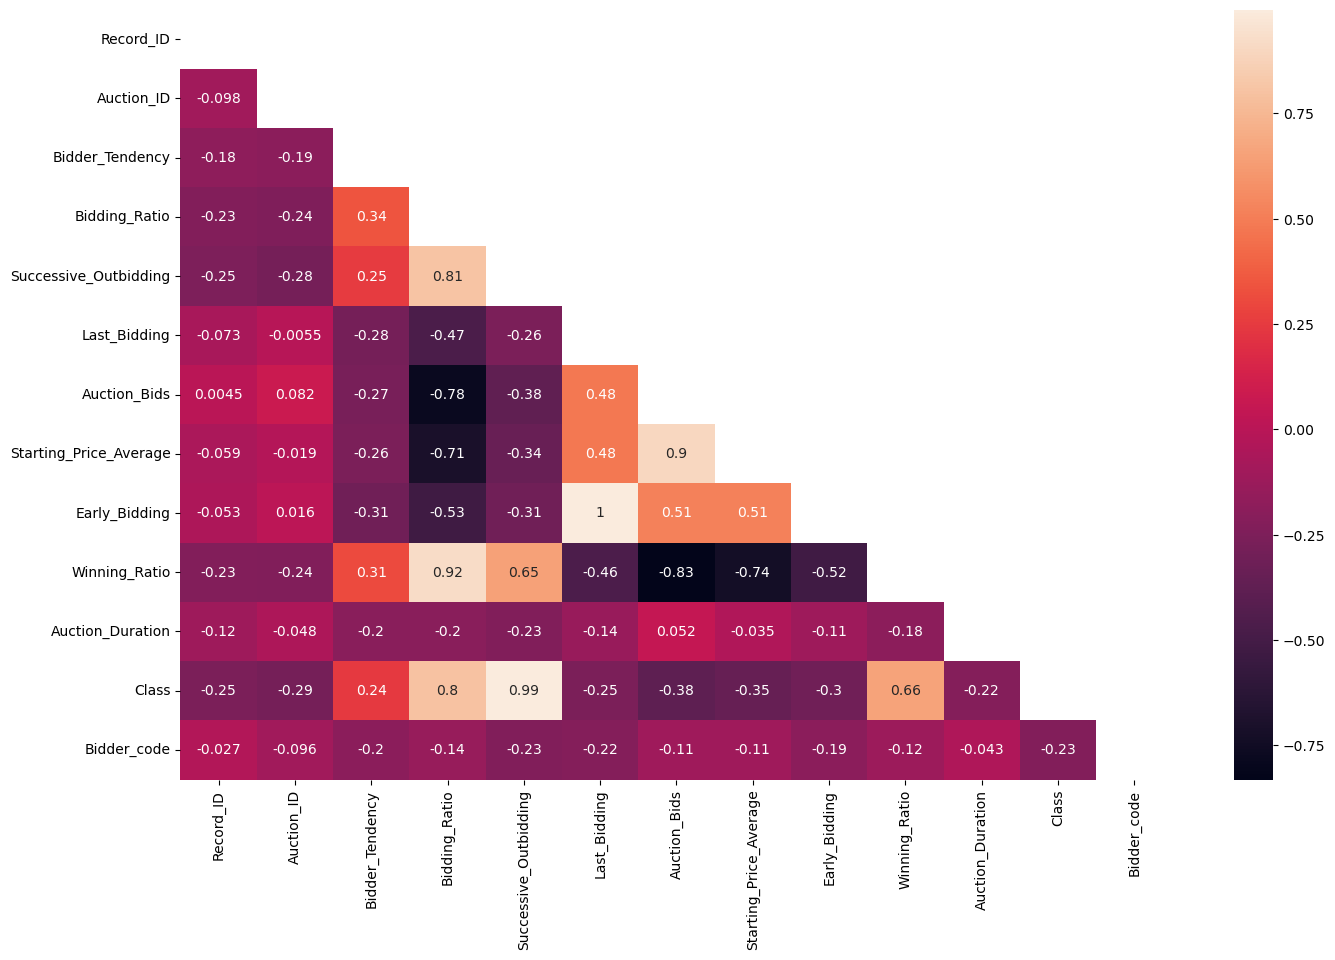

In [45]:
plt.figure(figsize=(16,10))
sns.heatmap(df_clean.corr(), mask=mask, annot=True)

**Here I used mask in my heatmap to hide the upper triangle of this correlation matrix.  I did this as it's a simpler and more direct result that I can read easily to isolate the features I want to look at more indepth**

**I wanted to view these features using plotly express in this isolated manner to better communicate what I am viewing and what it is telling me** 

**I chose to run this with 'Early Bidding' and 'Last Bidding' and 'Bidding Ratio' and 'Winning Ratio'**

In [46]:

fig = px.density_heatmap(df_clean, x="Early_Bidding", y="Last_Bidding")
fig.show()


**This tells me this highest count is at points -0.2 and 0.2 for both features** 

**This is a result I cannot see from the entire dataframe view**

In [47]:

fig = px.density_heatmap(df_clean, x="Bidding_Ratio", y="Winning_Ratio")
fig.show()

**I can see the highest count here is -0.5 to -0.001 for Bidding Ratio and -0.25 and -0.24for Winning Ratio**

<Axes: >

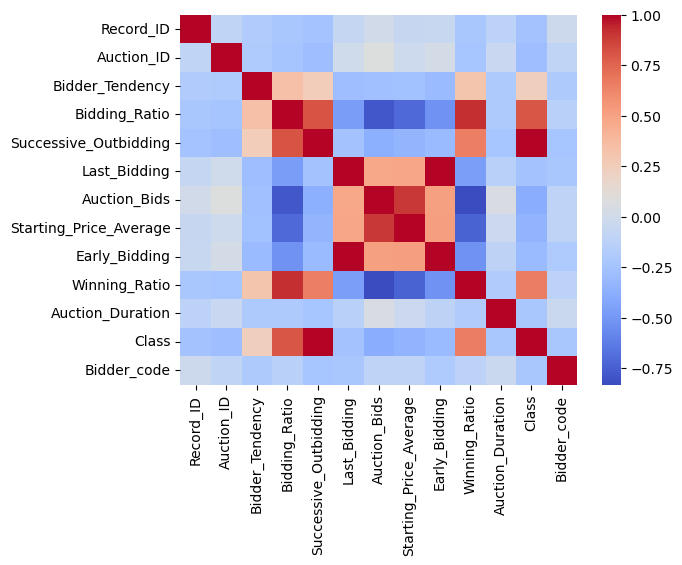

In [48]:
corr = df_clean.corr()

sns.heatmap(corr, cmap='coolwarm')

In [49]:
import plotly.graph_objs as go

trace = go.Heatmap(z=df_clean.values.tolist(),
                   x=df_clean.columns.tolist(),
                   y=df_clean.index.tolist(),
                   colorscale='Viridis')
layout = go.Layout(title='Correlation Heatmap')
fig = go.Figure(data=[trace], layout=layout)

# Show the plot in a web browser
fig.show()


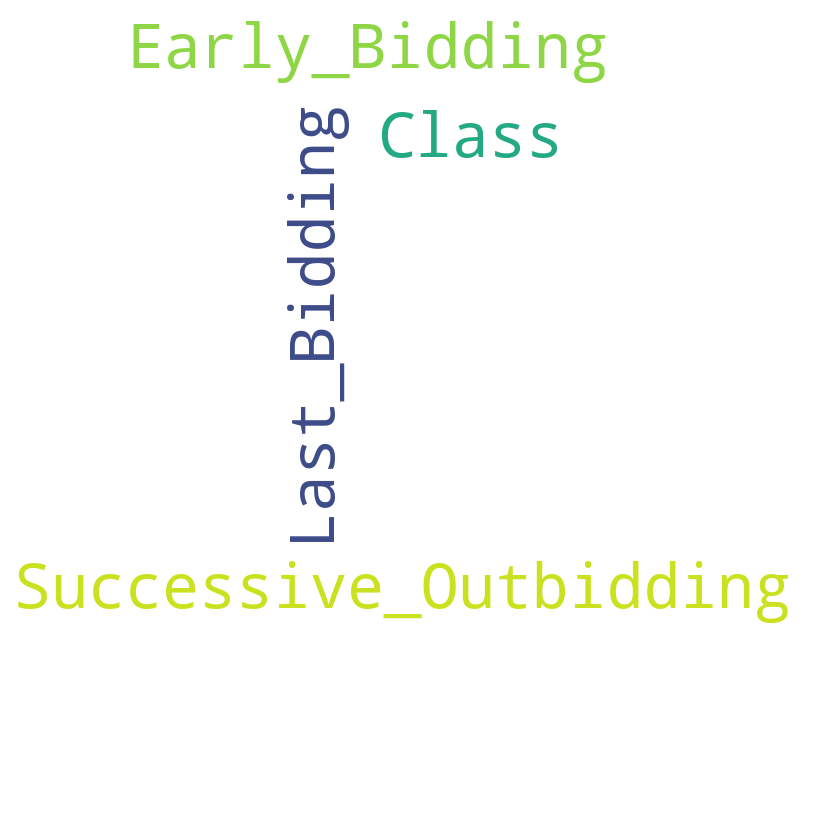

In [50]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


high_correlation = df_clean[df_clean.abs() > 0.8].stack().reset_index().rename(columns={0: 'corr'})
high_correlation = high_correlation[high_correlation['level_0'] != high_correlation['level_1']]
high_correlation = high_correlation.drop('corr', axis=1).astype(str).agg(' - '.join, axis=1)
high_correlation = high_correlation.unique()

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(high_correlation))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


Citation: This code was AI assisted 

**Summary: Strongest Correlations: Correlations above 0.8**

**a) Early Bidding and Last Bidding and b) Successive Outbidding and Class**

**I used world cloud as it's a simple, concise communication.  It is effective in audience communication and summarization. It requires no interpretation and effectively gives a short term solution to the target problem.  It's a great tool for basic insight**<cite id="efahs">(Jiang, 2021)</cite>



### Features and Target Variable

**I will now do the same visualisation segregated by normal and abnormal bids**

In [51]:
df_0= df_clean #df_0 (normal bidding)
df_1= df_clean #df_1 (abnormal bidding)

In [52]:
df_0= df_0[df_0['Class'] == "0"]
df_1 = df_1[df_1['Class'] == "1"]

**<font color = blue > Normal Bids**

In [53]:
#normal bids
mask = np.zeros_like(df_0.corr())
triangle_indices = np.triu_indices_from(mask)
mask [triangle_indices] = True

<Axes: >

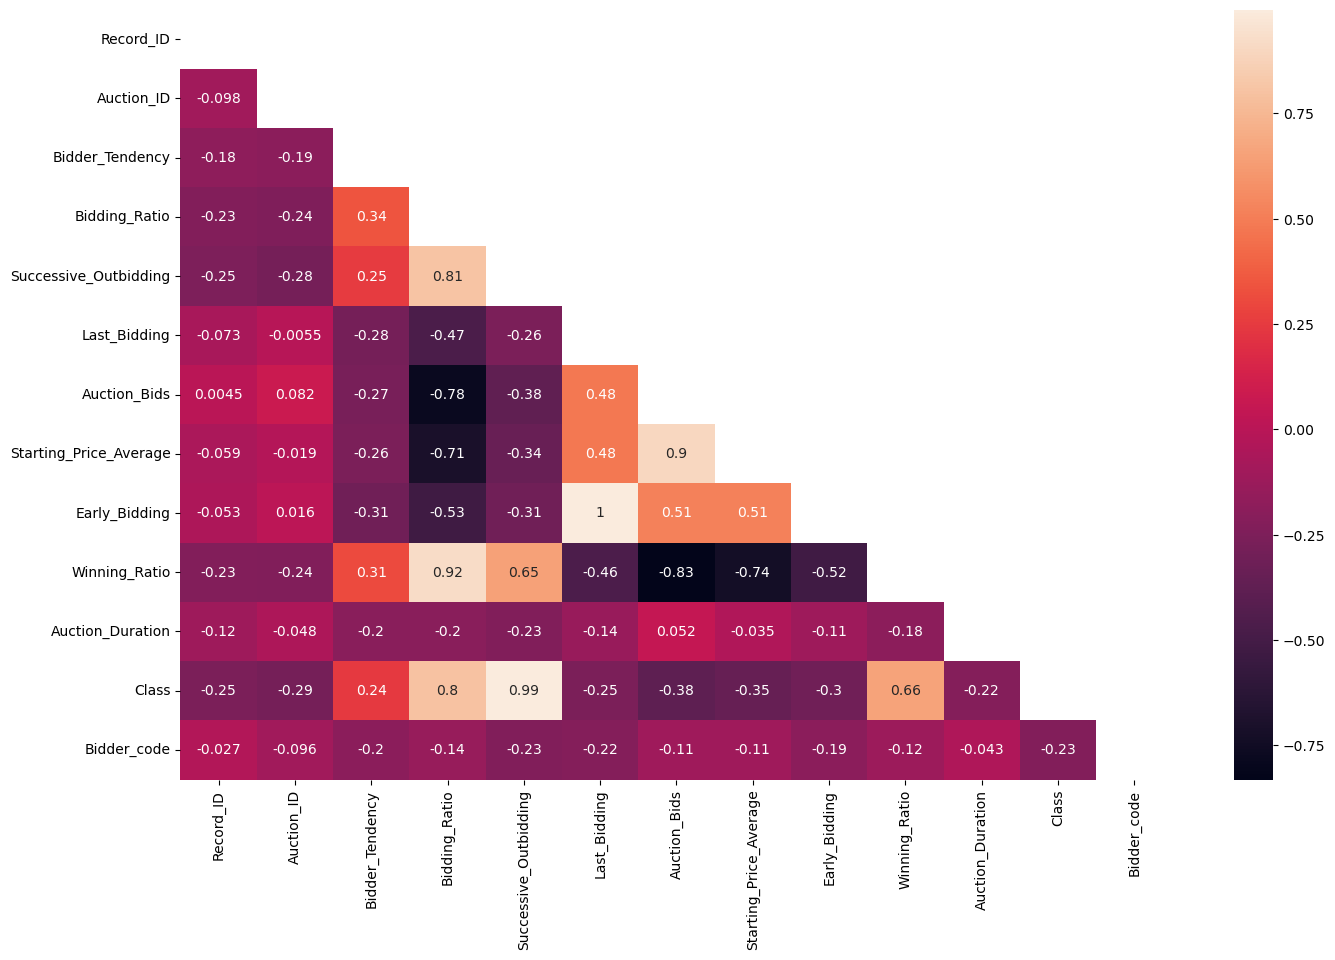

In [54]:
plt.figure(figsize=(16,10))
sns.heatmap(df_norm.corr(), mask=mask, annot=True)

**Summary: Strongest Correlations:**

**a)Successive Outbidding and Class, b) Early Bidding and Last Bidding**

**<font color = blue > Abnormal Bids**

In [55]:

mask = np.zeros_like(df_1.corr())
triangle_indices = np.triu_indices_from(mask)
mask [triangle_indices] = True

<Axes: >

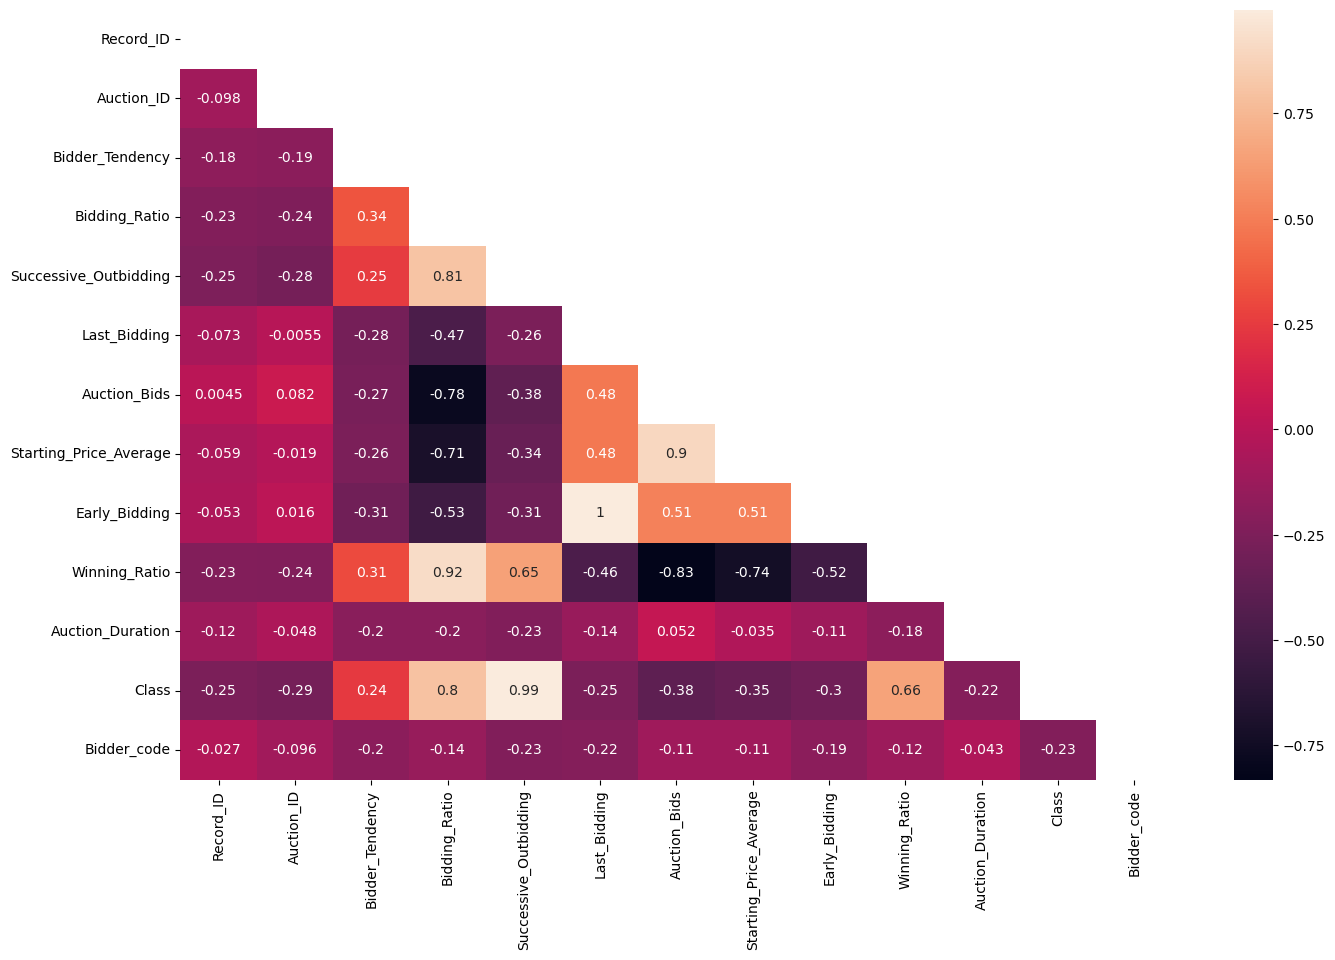

In [56]:
plt.figure(figsize=(16,10))
sns.heatmap(df_abnorm.corr(), mask=mask, annot=True)

**Summary: Strongest Correlations:**

**a)Successive Outbidding and Class, b) Early Bidding and Last Bidding**

### Feature Selection Conclusion: 

**The above matrix for abnormal bids reflects first two observations in it's observations of a) Early Bidding and Last Bidding and b) Successive Outbidding and Class.  We can Also observe a correlation between Winning Ratio and Bidding Ratio.  I will consider this when it comes to Feature selection**

# Decision Tree for Feature Importance


**I further concentrate analysis on significant features using decision trees**

In [57]:
# pip install dtreeviz

In [58]:
import matplotlib.pyplot as plt

from dtreeviz.trees import dtreeviz






CITE 

In [59]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier


**It is good practice I check in on the framework after manipulating it to make sure there are no errors so I execute .head() function**

**I then create two variables to split my data into independent versus dependent**

**After which I will run train/ test to employ decision tree and evaluate the accuracy** 


In [60]:
dfnew.head()

Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
0          1         732         0.200000       0.400000   
1          2         732         0.024390       0.200000   
2          3         732         0.142857       0.200000   
3          4         732         0.100000       0.200000   
4          5         900         0.051282       0.222222   

   Successive_Outbidding  Last_Bidding  Auction_Bids  Starting_Price_Average  \
0                    0.0      0.000028           0.0                0.993593   
1                    0.0      0.013123           0.0                0.993593   
2                    0.0      0.003042           0.0                0.993593   
3                    0.0      0.097477           0.0                0.993593   
4                    0.0      0.001318           0.0                0.000000   

   Early_Bidding  Winning_Ratio  Auction_Duration  Class  Bidder_code  
0       0.000028       0.666667                 5      0        302.0  
1       0.013123       0.944444                 5      0        513.0  
2       0.003042       1.000000                 5      0        908.0  
3       0.097477       1.000000                 5      0        234.0  
4       0.001242       0.500000                 7      0       1053.0

In [61]:
dfnew.isna().sum()

Record_ID                 0
Auction_ID                0
Bidder_Tendency           0
Bidding_Ratio             0
Successive_Outbidding     0
Last_Bidding              0
Auction_Bids              0
Starting_Price_Average    0
Early_Bidding             0
Winning_Ratio             0
Auction_Duration          0
Class                     0
Bidder_code               0
dtype: int64

**I split the data into dependent ('Class') and independent variables and run x and y through train test split**

In [62]:

X = dfnew.drop('Class',axis=1)

y = dfnew['Class']

In [63]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.20, 
                                                    random_state =38)
X_train.head()

Record_ID  Auction_ID  Bidder_Tendency  Bidding_Ratio  \
5810      13889         267         0.083333       0.031250   
3765       9001        2433         0.230769       0.176471   
5290      12672        1867         0.030303       0.125000   
715        1687        1628         0.033058       0.105263   
2101       5022        2318         0.033333       0.029412   

      Successive_Outbidding  Last_Bidding  Auction_Bids  \
5810                    0.0      0.862531      0.437500   
3765                    0.0      0.584443      0.000000   
5290                    0.0      0.219167      0.000000   
715                     0.5      0.928995      0.526316   
2101                    0.0      0.980373      0.470588   

      Starting_Price_Average  Early_Bidding  Winning_Ratio  Auction_Duration  \
5810                0.000000       0.862531       0.000000                 3   
3765                0.000000       0.006143       1.000000                 7   
5290                0.000000       0.219167       0.900000                 1   
715                 0.993593       0.927834       0.818182                 7   
2101                0.993593       0.980373       0.000000                10   

      Bidder_code  
5810         63.0  
3765        774.0  
5290        860.0  
715         569.0  
2101        384.0

In [64]:
clf = DecisionTreeClassifier(max_depth=3, random_state=38)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=38)

CITE: https://www.kdnuggets.com/2021/03/beautiful-decision-tree-visualizations-dtreeviz.html

In [65]:
#!pip install graphviz


In [66]:
#pip install dtreeviz

In [67]:
viz = dtreeviz(clf, X_train, y_train,
               feature_names=X_train.columns,
               target_name='Class')



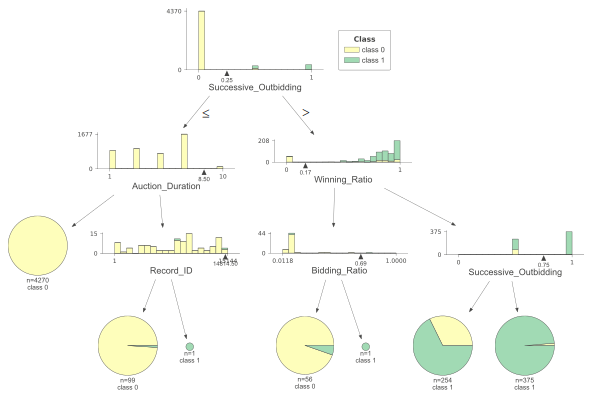

In [68]:
from IPython.display import display
display(viz)

<cite id="q50jk">(Parr & Grover, 2020)</cite>
        
        

**I used dtreeviz as it has complimentary visuals that make it more asthetically pleasing and easier to read for non techinical viewers. it's easier to interpret and is very user friendly** <cite id="rymcd">(Lewinson, 2021)</cite> **It also uses Feature Space so that the observer can understand how the decision tree partitions the data** <cite id="bd6rr">(Parr & Grover, 2020)</cite>

    

    

**I chose a depth of 5 as a parameter to stop further splitting of branches and provide a limit** 


    
**The Decision Tree repeats the features identified in correlation through recursive binary splitting and feature selection with “information gain” and “Gini Index”(Wong, 2022)**

**The Gini index is low in all features which indicates the tree is pure**
    
<font color = red> **Gini Index**

### Confusion Matrix 

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC

classifier = SVC()

classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95      1138
           1       0.00      0.00      0.00       127

    accuracy                           0.90      1265
   macro avg       0.45      0.50      0.47      1265
weighted avg       0.81      0.90      0.85      1265

[[1138    0]
 [ 127    0]]


**The model has excellent class '0' precision, which indicate that it correctly predicts class '0' 90% of the time. However, it has a low recall for class '1', which means that it only accurately guesses the true class of 1 0% of the time. The f1-score,  is high for class '0' but low for Class '1' which shows this 

<cite id="u7wla">({\em How to Use Confusion Matrix in Scikit-Learn (with Python Example) - JC Chouinard}, n.d.)</cite>


**The high accuracy, at 90% suggests that the model is able to generalize well to unseen data, which is an important consideration when using decision tree for feature selection**<cite id="lkkbc">[NO_PRINTED_FORM]</cite>



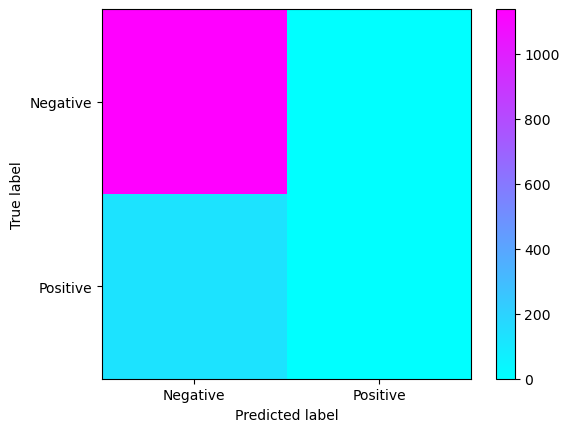

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap='cool')
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=['Negative', 'Positive'],
       yticklabels=['Negative', 'Positive'],
       xlabel='Predicted label',
       ylabel='True label')



fig.colorbar(im)

# Display
plt.show()

 


**The confusion matrix is telling me tehre are 1138 True Positves, 0 Falst Negatives, 127 False Positives and 0 True Negatives**

**I chose Reds to view this as they are more vibrant with a better contrast for the False Negatives and True Negative scores**

**I tried a variety of colors to visualize this as there isn't a distinction between 'positive/ positive' and 'positive/negative', such as plasma, hot and blue** <cite id="z1rlk">(Bergman et al., 1995)</cite> **However, cool was more uniform with teh visualisations that have gone previously as it helps the stakeholder scan the information with more ease** CITE https://medium.com/yotpoengineering/improving-presentation-design-skills-using-the-magic-of-consistency-9f7695a0cc9e#:~:text=Keeping%20things%20consistent%20when%20it,better%2C%20and%20understand%20it%20better. 

### Grid Search for the best parameters 

**I am doing to perform grid search for hyperparameter tuning to achieve the best performance with this dataset**<cite id="v6yw9">(Brownlee, 2020)</cite>

**It should return the best combination of parameters through cross-validation**


In [71]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             verbose=1)

In [72]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.011266      0.006453         0.001230        0.001005   
1       0.010732      0.001609         0.001210        0.000438   
2       0.004488      0.006199         0.003024        0.006049   
3       0.009426      0.005970         0.000000        0.000000   
4       0.009375      0.007655         0.000000        0.000000   
5       0.009487      0.007748         0.003143        0.006286   
6       0.009373      0.007653         0.000000        0.000000   
7       0.011499      0.006258         0.001127        0.002255   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               5                     50   
1            gini               5                     50   
2            gini               5                    100   
3            gini               5                    100   
4            gini              10                     50   
5            gini              10                     50   
6            gini              10                    100   
7            gini              10                    100   

  param_min_samples_split                                             params  \
0                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
1                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
2                      50  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
3                     100  {'criterion': 'gini', 'max_depth': 5, 'min_sam...   
4                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
5                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
6                      50  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   
7                     100  {'criterion': 'gini', 'max_depth': 10, 'min_sa...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.979249           0.985163           0.988131           0.988131   
1           0.979249           0.985163           0.988131           0.988131   
2           0.972332           0.970326           0.982196           0.983185   
3           0.972332           0.970326           0.982196           0.983185   
4           0.979249           0.985163           0.988131           0.988131   
5           0.979249           0.985163           0.988131           0.988131   
6           0.972332           0.970326           0.982196           0.983185   
7           0.972332           0.970326           0.982196           0.983185   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.983185         0.984772        0.003339                1  
1           0.983185         0.984772        0.003339                1  
2           0.981207         0.977849        0.005398                5  
3           0.981207         0.977849        0.005398                5  
4           0.983185         0.984772        0.003339                1  
5           0.983185         0.984772        0.003339                1  
6           0.981207         0.977849        0.005398                5  
7           0.981207         0.977849        0.005398                5

**Initially I can see the mean test score is high a low standard deviation which tells me the model is consistent and successfully generalizing to new data** <cite id="i9gni">(Boyle, 2019)</cite>


In [73]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.9847716619165465
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50)


**The accuracy result confirms the model is performing with high accuracy of 98%**


### Running Parameters from Grid Search

**I run the parameters from the grid search to refine my feature selection** 

In [74]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [75]:
clf_gini.score(X_test,y_test)

0.991304347826087

In [76]:
from dtreeviz.trees import DTreeViz



In [77]:
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Visualize the decision tree
viz = dtreeviz(clf, X, y,
               target_name='class',
               feature_names=X.columns.tolist(),
               class_names=list(y.unique()))


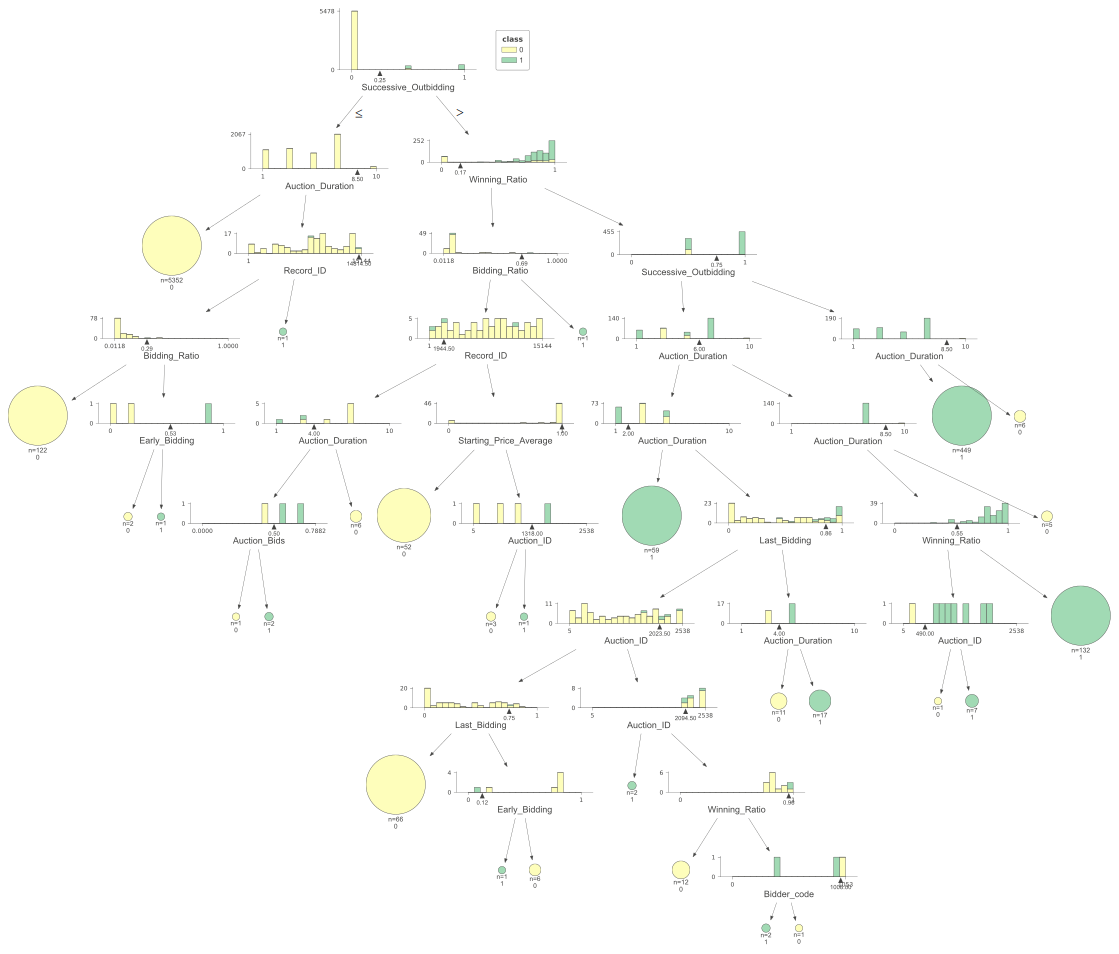

In [78]:
from IPython.display import display
display(viz)

**I chose to use dtreeviz for gini score predicition for the same reasons I used it for Decision Tree.  Howevere, this does not have the same resulting objective as it is too detailed and better for analysts rather than stakeholders**

**The Gini score is extremely high at 99%**

### Ranking Feature Importance with Gini Scores

In [79]:
clf_gini.feature_importances_


array([0.00000000e+00, 2.83411090e-04, 9.02288369e-05, 0.00000000e+00,
       8.79014959e-01, 1.12057316e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.43441443e-02, 3.50615255e-02, 0.00000000e+00])

In [80]:
df_fi = pd.DataFrame ({'Feature_names': X.columns, 'Importances': clf_gini.feature_importances_})
df_fi





Feature_names  Importances
0                Record_ID     0.000000
1               Auction_ID     0.000283
2          Bidder_Tendency     0.000090
3            Bidding_Ratio     0.000000
4    Successive_Outbidding     0.879015
5             Last_Bidding     0.011206
6             Auction_Bids     0.000000
7   Starting_Price_Average     0.000000
8            Early_Bidding     0.000000
9            Winning_Ratio     0.074344
10        Auction_Duration     0.035062
11             Bidder_code     0.000000

In [81]:
import plotly.graph_objects as go
import pandas as pd


total_importance = df_fi['Importances'].sum()
df_fi['Percentages'] = df_fi['Importances'] / total_importance * 100

colors = ['rgb(150, 200, 255)', 'rgb(120, 180, 220)', 'rgb(90, 160, 190)', 'rgb(60, 140, 160)',
          'pink', 'turquoise', 'rgb(30, 120, 130)', 'rgb(60, 140, 160)',
          'rgb(90, 160, 190)', 'rgb(120, 180, 220)', 'rgb(150, 200, 255)', 'rgb(180, 220, 255)']


# Create the bar plot
fig = go.Figure(data=[go.Bar(x=df_fi['Feature_names'], y=df_fi['Percentages'], marker_color=colors)])

# Add labels and title
fig.update_layout(
    xaxis_title='Feature Names',
    yaxis_title='Importance (%)',
    title='Feature Importances'
)

# Show the interactive plot
fig.show()



**Here I used AI Assistance to rework the colours, again, to maintain a paletable consistency for the viewing audience**

**I stuck to a bar chart, again as the lengths can be a good communicator as to the highest performing features, these being successive_outbidding, 'last_bidding' winning_ratio' and 'Auction_Duratino'.  This further cements the features that are going to contribute to prediction and the features that require further visualisations**

**Percentages are much more understandable to a non technical audience so I converted it for a more understable view of the ratio differences**

**I now use cross validation to view accuracy of Feature Selection**

In [82]:

from sklearn.model_selection import cross_val_score


X = dfnew.drop('Class', axis=1)
y = dfnew['Class']

clf = DecisionTreeClassifier()
clf.fit(X, y)


feature_importances = clf.feature_importances_


scores = cross_val_score(clf, X, y, cv=5)


corr_matrix = X.corr()


print("Cross-validation scores:", scores)



Cross-validation scores: [0.99604743 0.9960443  0.99841772 0.99446203 0.99287975]


In [83]:
import pandas as pd

# Assuming you have a DataFrame named 'df'

# Method 1: Saving DataFrame as CSV in the working directory
dfnew.to_csv('output.csv', index=False)



**There are corresponding results from the correlation and the decision tree feature importance, and cross validation confirms the accuracy is high and this indicates that the model is performing very well on unseen data. I can therefore derive the following conclusion with confidence:**

**The main features to consider when predicting bids are**

1. Success Outbidding 
2. Early Bidding and Last Bidding 
3. Winning Ration and Bidding Ratio

**The rest of the features, are in my opinion, relevant to the overall pattern of the bids.  I considered dropping either Record ID or Auction ID as I didn't want multiple identifiers obscuring the data. However, from the literature as previous learned, the Auction ID is very relevant to the Successive Outbidding which is the highest indicator of shill bidding.  I will keep the Record ID until the data tells me otherwise**

**I will drop 'Record_ID' as it is an indicator and will skew the data through normalisation.  The only feature that I want to scale is Auction Duration as it's the only one out of bounds of of 0 and 1 and it has a value as opposed to Auction ID and Bidder code, which are categorical references.  It also has outliers which may be dealt with through scaling**

**For categorical variables, which are not numeric in nature, I do not need to apply any type of scaling or normalization** <cite id="5d2py">(Kuhn & Johnson, 2013)</cite>




In [84]:
dfnew1 = dfnew.drop(columns = ['Record_ID'])
dfnew1.head()

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0         732         0.200000       0.400000                    0.0   
1         732         0.024390       0.200000                    0.0   
2         732         0.142857       0.200000                    0.0   
3         732         0.100000       0.200000                    0.0   
4         900         0.051282       0.222222                    0.0   

   Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0      0.000028           0.0                0.993593       0.000028   
1      0.013123           0.0                0.993593       0.013123   
2      0.003042           0.0                0.993593       0.003042   
3      0.097477           0.0                0.993593       0.097477   
4      0.001318           0.0                0.000000       0.001242   

   Winning_Ratio  Auction_Duration  Class  Bidder_code  
0       0.666667                 5      0        302.0  
1       0.944444                 5      0        513.0  
2       1.000000                 5      0        908.0  
3       1.000000                 5      0        234.0  
4       0.500000                 7      0       1053.0

**I'll create a copy so I can run PCA later in the dataset**

In [85]:
df_kmeans = dfnew1.copy()

## Principal Componant Analysis (PCA)

**I am using PCA for dimensionality reduction as it performed better against LDA**

In [86]:
from sklearn.decomposition import PCA 

df_kmeans.reset_index(drop=True, inplace=True)

df_kmeans.head()

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0         732         0.200000       0.400000                    0.0   
1         732         0.024390       0.200000                    0.0   
2         732         0.142857       0.200000                    0.0   
3         732         0.100000       0.200000                    0.0   
4         900         0.051282       0.222222                    0.0   

   Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0      0.000028           0.0                0.993593       0.000028   
1      0.013123           0.0                0.993593       0.013123   
2      0.003042           0.0                0.993593       0.003042   
3      0.097477           0.0                0.993593       0.097477   
4      0.001318           0.0                0.000000       0.001242   

   Winning_Ratio  Auction_Duration  Class  Bidder_code  
0       0.666667                 5      0        302.0  
1       0.944444                 5      0        513.0  
2       1.000000                 5      0        908.0  
3       1.000000                 5      0        234.0  
4       0.500000                 7      0       1053.0

In [87]:
X = df_kmeans.drop('Class', axis=1)
y = df_kmeans['Class']

Text(0, 0.5, 'Cumulative explained variance')

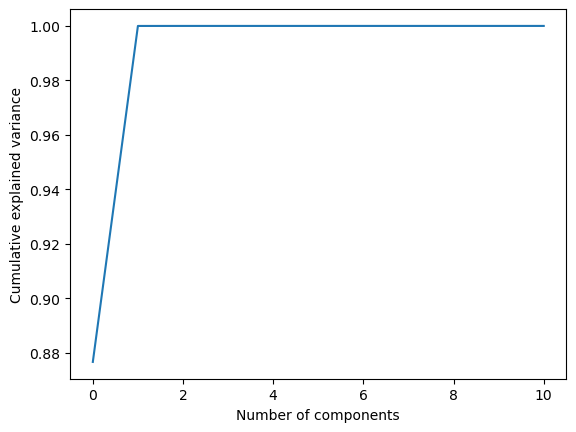

In [88]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets for PCA
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X, y, test_size=0.2, random_state=38)


# Perform PCA on the training set
pca = PCA().fit(X_train_pca)

# Plot the cumulative explained variance for each principal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')



**The cumulative explained varience indicates 1 component.  However, I am going to run with 2 components to capture subtle differences for better visualisations**


In [89]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled_pca= scaler.fit_transform(X_train_pca)

# Apply PCA on the scaled data
pca = PCA(n_components=2)
data = pca.fit_transform(X_scaled_pca)

# transform data onto the first two principal components
X_pca = pca.transform(X_scaled_pca)


print("Original shape: {}".format(str(X_scaled_pca.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))

Original shape: (5056, 11)
Reduced shape: (5056, 2)


In [90]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


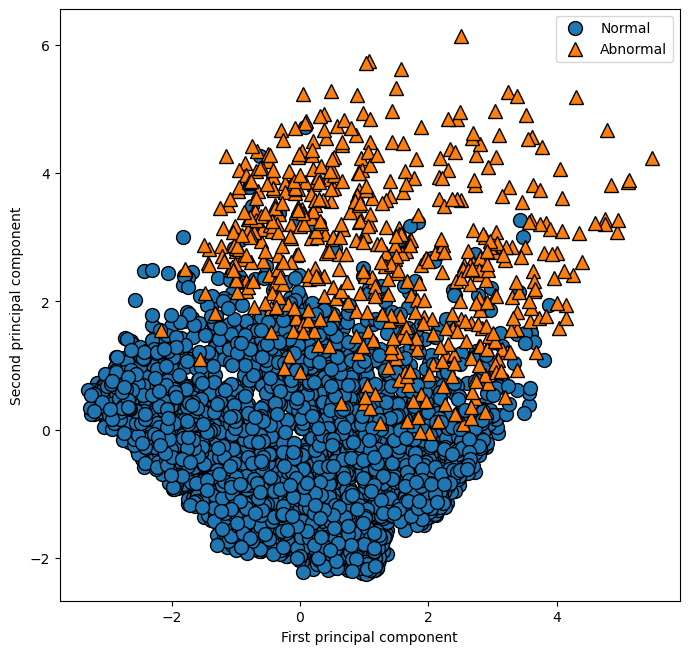

In [91]:
import mglearn

y = df_kmeans['Class']
y_train_pca, y_test_pca = train_test_split(y, test_size=0.2, random_state=38)


plt.figure(figsize = (8, 8))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_train_pca)
plt.legend(['Normal', 'Abnormal'], loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component");


Citation: Mohammad Lecture Notes 

**I used mglearn discrete scatter as it's dynamic and provides clear grouping. The different colors combined with different shapes assist in distinguishing the scatters which are often not well separated before PCA** CITE Lecture 15

Text(0, 0.5, 'Principal components')

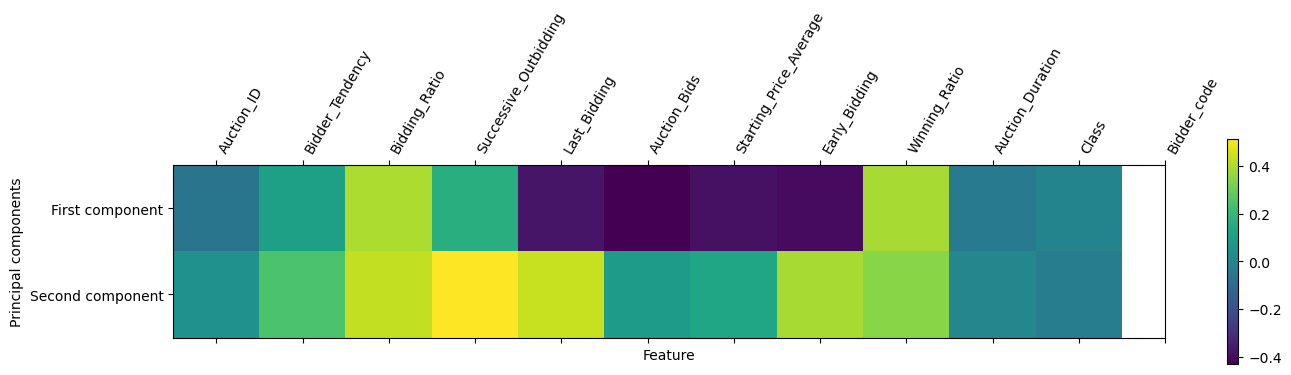

In [92]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1], ["First component", "Second component"])
plt.colorbar()
plt.xticks(range(len(df_kmeans.columns)),
df_kmeans.columns, rotation=60, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components")



Citation Mohammad Lecture Notes

**I chose to include this color bar as it is dynamic at presenting the results and highlightign patterns and relationships**

# K-Means Clustering 

**I want to understand the number of clusters I need to use so I implement wcss as learned in Mohammed's class and used my original code to implement the below**

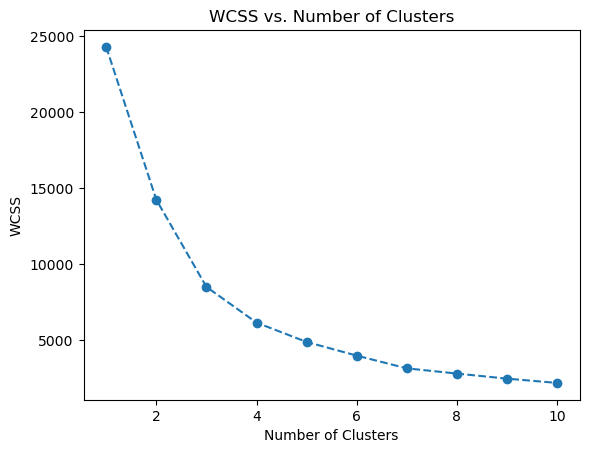

In [93]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Calculate the WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=38)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.title('WCSS vs. Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


Citation: This code was AI assisted 

**I used '--' line style as it shows the shape of the curve better and therefore I can interpret which cluster count I will use with more accuracy**

In [94]:
print("Cluster memberships:\n{}".format(kmeans.labels_))

Cluster memberships:
[7 9 4 ... 7 7 5]


In [95]:
X_pca.shape

(5056, 2)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y_train_pca, test_size=0.2, random_state=38)



In [97]:

# Perform k-means clustering on the first two principal components
kmeans = KMeans(n_clusters=4)
labels = kmeans.fit_predict(X_train)



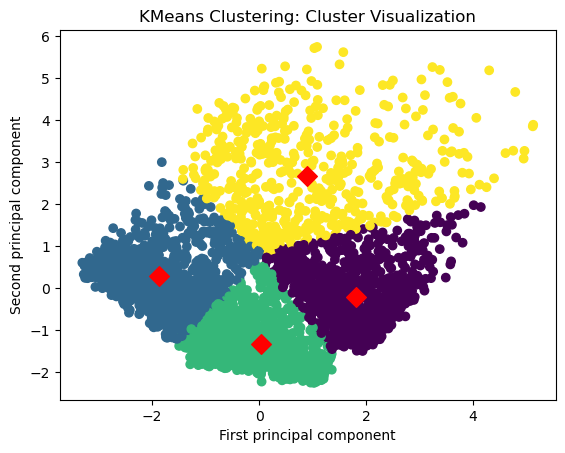

In [98]:
import matplotlib.pyplot as plt

# Get the cluster labels for the training set
train_labels = kmeans.labels_

# Get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# Create a scatter plot of the training data points colored by cluster
plt.scatter(X_train[:, 0], X_train[:, 1], c=train_labels, cmap='viridis')

# Plot the cluster centers as red diamonds
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='D', c='red', s=100)

# Set labels and title for the plot
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("KMeans Clustering: Cluster Visualization")

# Display the plot
plt.show()



<cite id="ysi7i">(Jha, 2021)</cite>

Citation: Mohammad Iqbal Lecture Notes



**Finding four unique clusters after using k-means clustering to a numerical data reveals important information about the information. It indicates there is grouping and separation There are four distinct groups with a central centroid. there are also relationships as the clusters are close together and there is a high standard of correlation between the datapoints** 


In [99]:
#pip install yellowbrick

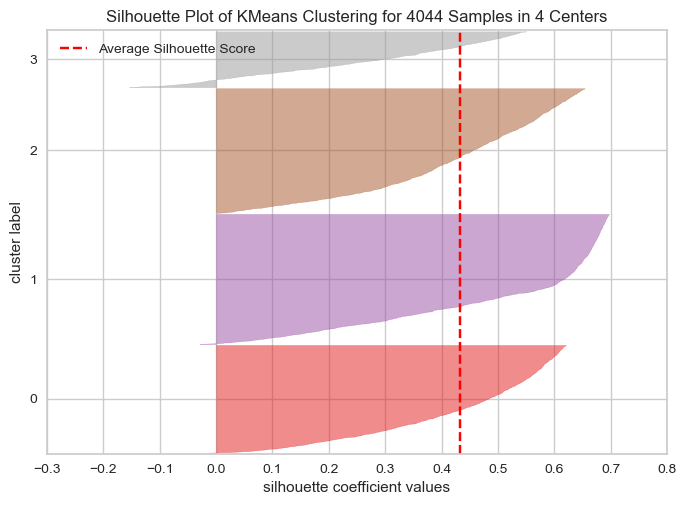

In [100]:
from yellowbrick.cluster import SilhouetteVisualizer
import matplotlib.pyplot as plt

visualizer = SilhouetteVisualizer(kmeans)
visualizer.fit(X_train)

visualizer.show();


<cite id="3e6yw">(Scikit, 2023)</cite>

**The density and distance between clusters can be assessed using silhouette analysis. By averaging the silhouette coefficient for each sample, which is derived as the difference between the mean nearest-cluster distance and the mean intra-cluster distance for each sample, normalized by the maximum value, the score is determined. Users of the SilhouetteVisualizer can see the density and spacing of the clusters by seeing the silhouette coefficient for each sample on a per-cluster basis.**

<cite id="odnnh">(District DataLabs, 2020)</cite>

**This visualisation is excellent for kmeans as it shows the silhouette coefficent per cluster and clearly denotes the separation and sizes.The red like denotes the average silhouette score for each cluster** CITE Sihouette Visualizer 

### Intercluster distance map 

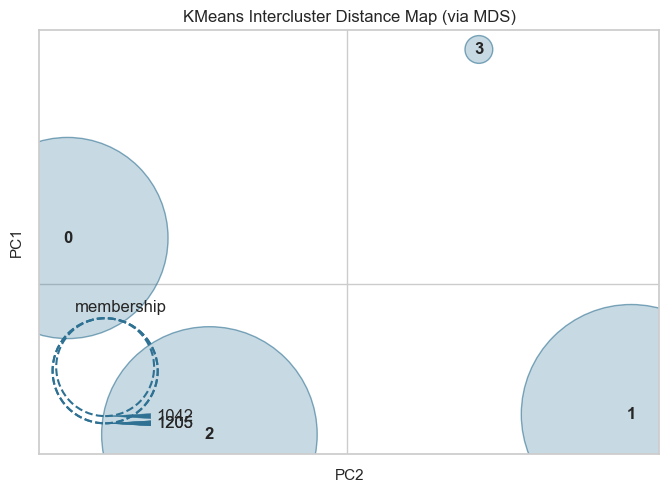

In [101]:
from yellowbrick.cluster import InterclusterDistance


visualizer = InterclusterDistance(kmeans)

visualizer.fit(X)        
visualizer.show();

**The notebook community mentions Intercluster distance method.  This did not have the same success, however it does affirm the separation and sizes** <cite id="rb7c4">(District DataLabs, 2020)</cite>

In [102]:

y_pred = kmeans.predict(X_test)


cm = confusion_matrix(y_test, y_pred)


cr = classification_report(y_test, y_pred)

print(cm)
print(cr)


[[242 340 289  40]
 [ 14   2   0  85]
 [  0   0   0   0]
 [  0   0   0   0]]
              precision    recall  f1-score   support

           0       0.95      0.27      0.41       911
           1       0.01      0.02      0.01       101
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0

    accuracy                           0.24      1012
   macro avg       0.24      0.07      0.11      1012
weighted avg       0.85      0.24      0.37      1012



**The results after Kmeans indicate that the model is performing well, and predicting the fraudulant bids accurately but not capturing the normal bids as well.  However, since the objective is to predict the abnormal bids, this is a good result**

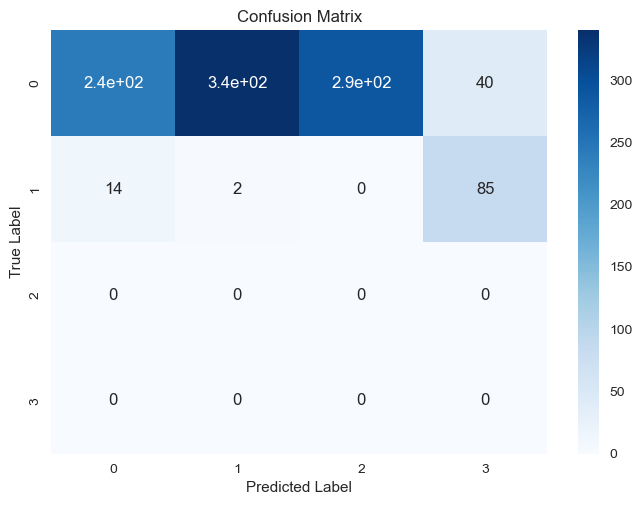

In [103]:
sns.heatmap(cm, annot=True, cmap="Blues")

# Add labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Display the plot
plt.show()


## View Clusters based on Last_Bidding for Abnormal Bidding

In [104]:
df_kmeans.head()


Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0         732         0.200000       0.400000                    0.0   
1         732         0.024390       0.200000                    0.0   
2         732         0.142857       0.200000                    0.0   
3         732         0.100000       0.200000                    0.0   
4         900         0.051282       0.222222                    0.0   

   Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0      0.000028           0.0                0.993593       0.000028   
1      0.013123           0.0                0.993593       0.013123   
2      0.003042           0.0                0.993593       0.003042   
3      0.097477           0.0                0.993593       0.097477   
4      0.001318           0.0                0.000000       0.001242   

   Winning_Ratio  Auction_Duration  Class  Bidder_code  
0       0.666667                 5      0        302.0  
1       0.944444                 5      0        513.0  
2       1.000000                 5      0        908.0  
3       1.000000                 5      0        234.0  
4       0.500000                 7      0       1053.0

In [105]:
### Sankey

In [106]:
df_kmeans['Class'] = df_kmeans['Class'].replace({0: 'Normal Bids', 1: 'Abnormal Bids'})


df_kmeans.head()


Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0         732         0.200000       0.400000                    0.0   
1         732         0.024390       0.200000                    0.0   
2         732         0.142857       0.200000                    0.0   
3         732         0.100000       0.200000                    0.0   
4         900         0.051282       0.222222                    0.0   

   Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0      0.000028           0.0                0.993593       0.000028   
1      0.013123           0.0                0.993593       0.013123   
2      0.003042           0.0                0.993593       0.003042   
3      0.097477           0.0                0.993593       0.097477   
4      0.001318           0.0                0.000000       0.001242   

   Winning_Ratio  Auction_Duration        Class  Bidder_code  
0       0.666667                 5  Normal Bids        302.0  
1       0.944444                 5  Normal Bids        513.0  
2       1.000000                 5  Normal Bids        908.0  
3       1.000000                 5  Normal Bids        234.0  
4       0.500000                 7  Normal Bids       1053.0

In [107]:
import plotly.graph_objects as go


value_0 = 10
value_1 = 20
value_2 = 30
value_class_0 = 5
value_class_1 = 15


fig = go.Figure(data=[go.Sankey(
    node=dict(
        label=["Successive_Outbidding", "Auction_Duration", "Winning_Ratio", "Normal Bids", "Abnormal Bids"],
        color=["lightblue", "orange", "green", "purple", "pink"]  # Custom colors for each feature
    ),
    link=dict(
        source=[0, 1, 2, 0, 1],
        target=[3, 3, 3, 4, 4],
        value=[value_0, value_1, value_2, value_class_0, value_class_1],
        color="rgba(0, 0, 0, 0.3)"  # Color of the connecting lines
    )
)])


fig.update_layout(
    title="Sankey Diagram: Feature Relationship with Class",
    font=dict(size=12, color="black"),
    width=800,
    height=600
)


fig.show()


<cite id="20gmz">(Plotly, 2023a)</cite>
Citation: The code was AI assisted 

**Sankey is an excellent tool to view flow and distribution and I used it specifically for this reason.  It offers clarity and contect** <cite id="boznm">(Mekhatria, n.d.)</cite>
**I chose the colors to distinguish between features and complimentary colors for the values in the 'Class' feature to assist in commmunicating that it is not separte features that have been plotted**

**It is interactive and provides buttons such as download, box select, lasso select, reset view and source*

In [108]:
df_kmeans.head(20)

Auction_ID  Bidder_Tendency  Bidding_Ratio  Successive_Outbidding  \
0          732         0.200000       0.400000                    0.0   
1          732         0.024390       0.200000                    0.0   
2          732         0.142857       0.200000                    0.0   
3          732         0.100000       0.200000                    0.0   
4          900         0.051282       0.222222                    0.0   
5          900         0.038462       0.111111                    0.0   
6          900         0.087386       0.222222                    0.0   
7          900         0.137931       0.444444                    1.0   
8         2370         0.121951       0.185185                    1.0   
9          600         0.155172       0.346154                    0.5   
10        2172         0.087386       0.562500                    1.0   
11        1370         0.087386       0.105263                    0.0   
12        1370         0.017241       0.052632                    0.0   
13        2236         0.041322       0.208333                    1.0   
14        2236         0.142857       0.041667                    0.0   
15        2236         0.007246       0.041667                    0.0   
16        2236         0.010000       0.041667                    0.0   
17        2236         0.025641       0.041667                    0.0   
18        2370         0.172414       0.185185                    1.0   
19        2370         0.010309       0.037037                    0.0   

    Last_Bidding  Auction_Bids  Starting_Price_Average  Early_Bidding  \
0       0.000028      0.000000                0.993593       0.000028   
1       0.013123      0.000000                0.993593       0.013123   
2       0.003042      0.000000                0.993593       0.003042   
3       0.097477      0.000000                0.993593       0.097477   
4       0.001318      0.000000                0.000000       0.001242   
5       0.016844      0.000000                0.000000       0.016844   
6       0.006781      0.000000                0.000000       0.006774   
7       0.768044      0.000000                0.000000       0.016311   
8       0.035021      0.333333                0.993528       0.023963   
9       0.570994      0.307692                0.993593       0.413788   
10      0.457631      0.000000                0.000000       0.457474   
11      0.028692      0.052632                0.000000       0.028654   
12      0.057655      0.052632                0.000000       0.057655   
13      0.286045      0.250000                0.000000       0.286025   
14      0.387348      0.250000                0.000000       0.387348   
15      0.547427      0.250000                0.000000       0.547427   
16      0.589286      0.250000                0.000000       0.589286   
17      0.912639      0.250000                0.000000       0.912639   
18      0.133783      0.333333                0.993528       0.048748   
19      0.130995      0.333333                0.993528       0.130995   

    Winning_Ratio  Auction_Duration          Class  Bidder_code  
0        0.666667                 5    Normal Bids        302.0  
1        0.944444                 5    Normal Bids        513.0  
2        1.000000                 5    Normal Bids        908.0  
3        1.000000                 5    Normal Bids        234.0  
4        0.500000                 7    Normal Bids       1053.0  
5        0.800000                 7    Normal Bids        565.0  
6        0.750000                 7    Normal Bids        694.0  
7        1.000000                 7  Abnormal Bids        616.0  
8        0.944444                 7  Abnormal Bids        513.0  
9        0.611111                 7  Abnormal Bids        470.0  
10       0.600000                 7  Abnormal Bids        769.0  
11       0.666667                 7    Normal Bids        220.0  
12       0.000000                 7    Normal Bids        577.0  
13       0.8

## Interaction Dashboard - Dash 

In [109]:
# pip install dash

Note: you may need to restart the kernel to use updated packages.


In [110]:
#pip install jupyter dash

Note: you may need to restart the kernel to use updated packages.


In [116]:

from dash import Dash, dcc, html, Input, Output
import plotly.express as px

app = Dash(__name__)

app.layout = html.Div([
    dcc.Graph(id='graph-with-slider'),
    dcc.Slider(
        id='Auction_ID',  # Corrected ID
        min=df_kmeans['Auction_ID'].min(),
        max=df_kmeans['Auction_ID'].max(),
        step=None,
        value=df_kmeans['Auction_ID'].min(),
        marks={str(Auction_ID): str(Auction_ID) for Auction_ID in df_kmeans['Auction_ID'].unique()}
    )
])

@app.callback(
    Output('graph-with-slider', 'figure'),
    Input('Auction_ID', 'value'))  # Corrected ID
def update_figure(selected_ID):
    filtered_df = df_kmeans[df_kmeans.Auction_ID == selected_ID]

    fig = px.scatter(filtered_df, x="Bidder_Tendency", y="Bidding_Ratio",
                     size="Auction_Bids", color="Class", hover_name="Bidder_code",
                     log_x=True, size_max=55)

    return fig

if __name__ == '__main__':
    app.run_server(debug=True)

Cite: https://www.youtube.com/watch?v=hSPmj7mK6ng&t=1533s&ab_channel=CharmingData

# Bibliography

https://voila.readthedocs.io/en/stable/using.html
https://www.youtube.com/watch?v=hSPmj7mK6ng&t=1533s&ab_channel=CharmingData


\begin{thebibliography}{4}
\bibitem{zotero|12244698/LJEL634N}
Amipara, K. (2019, November 20). Better visualization of Pie charts by MatPlotLib. {\em Medium}. https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f


\bibitem{zotero|12244698/R9JAF3YU}
Bergman, L. D., Rogowitz, B. E., & Treinish, L. A. (1995). A rule-based tool for assisting colormap selection. {\em Proceedings Visualization ’95}, 118-125,. https://doi.org/10.1109/VISUAL.1995.480803


\bibitem{zotero|12244698/6F5BWPCU}
Boyle, T. (2019, February 16). {\em Hyperparameter Tuning}. Medium. https://towardsdatascience.com/hyperparameter-tuning-c5619e7e6624


\bibitem{zotero|12244698/RP76S4D7}
Brownlee, J. (2019, November 26). How to Choose a Feature Selection Method For Machine Learning. {\em MachineLearningMastery.Com}. https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/


\bibitem{zotero|12244698/87J3BEHS}
Brownlee, J. (2020, September 13). Hyperparameter Optimization With Random Search and Grid Search. {\em MachineLearningMastery.Com}. https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/


\bibitem{zotero|12244698/EKEEPAKK}
Cavin, A. (2022, August 4). {\em 6 Ways to Encode Features for Machine Learning Algorithms}. Medium. https://towardsdatascience.com/6-ways-to-encode-features-for-machine-learning-algorithms-21593f6238b0


\bibitem{zotero|12244698/HE9DEKIW}
Cheryl. (2020, November 4). study notes: Handling Skewed data for Machine Learning models. {\em Medium}. https://reinec.medium.com/my-notes-handling-skewed-data-5984de303725


\bibitem{zotero|12244698/8FEAHEDL}
Cisneros, M. (2020, May 6). {\em choosing colors for data visualization}. Storytelling with Data. https://www.storytellingwithdata.com/blog/2020/5/6/picking-the-right-colors


\bibitem{zotero|12244698/MA4NFB2B}
District DataLabs, Y. (2020). {\em | notebook.community}. https://notebook.community/DistrictDataLabs/yellowbrick/examples/clustering_visualizers


\bibitem{zotero|12244698/H5JHWSWC}
Gawali, S. (2021, May 2). Skewness and Kurtosis |Shape of data: Skewness and Kurtosis. {\em Analytics Vidhya}. https://www.analyticsvidhya.com/blog/2021/05/shape-of-data-skewness-and-kurtosis/


\bibitem{zotero|12244698/Y3US9K5L}
{\em How to use Confusion Matrix in Scikit-Learn (with Python Example) - JC Chouinard}. (n.d.). Retrieved May 28, 2023, from https://www.jcchouinard.com/confusion-matrix-in-scikit-learn/


\bibitem{zotero|12244698/QPPT7GM6}
Ingebretsen Carlson, J., & Wu, T. (2022). Shill bidding and information in eBay auctions: A Laboratory study. {\em Journal of Economic Behavior & Organization}, {\em 202}, 341–360. https://doi.org/10.1016/j.jebo.2022.08.010


\bibitem{zotero|12244698/HQ67XFIH}
Jha, W. (2021, February 28). Implementation of Principal Component Analysis(PCA) in K Means Clustering. {\em Analytics Vidhya}. https://medium.com/analytics-vidhya/implementation-of-principal-component-analysis-pca-in-k-means-clustering-b4bc0aa79cb6


\bibitem{zotero|12244698/FFPYEPZW}
Jiang, Z. (2021, April 30). {\em Word Cloud: A tool of visualization, communication and insights}. Ze Jiang. https://zejiang-unsw.github.io/posts/2021/04/blog-post-2/


\bibitem{zotero|12244698/WGS2REPG}
Kosourova, E. (2021, July 26). {\em 2 Efficient Ways of Creating Fancy Pictogram Charts in Python}. Medium. https://towardsdatascience.com/2-efficient-ways-of-creating-fancy-pictogram-charts-in-python-8b77d361d500


\bibitem{zotero|12244698/G6W3WTK4}
Kuhn, M., & Johnson, K. (2013). {\em Applied Predictive Modeling}.


\bibitem{zotero|12244698/BHENWDT8}
Lewinson, E. (2021, August 26). {\em Beautiful decision tree visualizations with dtreeviz}. Medium. https://towardsdatascience.com/beautiful-decision-tree-visualizations-with-dtreeviz-af1a66c1c180


\bibitem{zotero|12244698/T22UKKWH}
Li, G. (2023). {\em PyWaffle}. https://github.com/gyli/PyWaffle (Original work published 2017)


\bibitem{zotero|12244698/5V72C85I}
LinkedIn Data Management. (2023). {\em What are the benefits of using interactive data visualizations for data analysis and communication?} https://www.linkedin.com/advice/1/what-benefits-using-interactive-data-visualizations


\bibitem{zotero|12244698/C3YAD5MK}
Majadi, N., Trevathan, J., Gray, H., Estivill-Castro, V., & Bergmann, N. (2017). Real-time detection of shill bidding in online auctions: A literature review. {\em Computer Science Review}, {\em 25}, 1–18. https://doi.org/10.1016/j.cosrev.2017.05.001


\bibitem{zotero|12244698/AYLPM7PR}
McDonald, A. (2023, February 9). {\em How to Create Beautiful Waffle Charts for Data Visualisation in Python}. Medium. https://towardsdatascience.com/how-to-create-beautiful-waffle-charts-for-data-visualisation-in-python-e9760a3f8594


\bibitem{zotero|12244698/EE36843J}
Mekhatria. (n.d.). What is a Sankey diagram? {\em Highcharts}. Retrieved May 28, 2023, from https://www.highcharts.com/blog/tutorials/what-is-a-sankey-diagram/


\bibitem{zotero|12244698/Y4I6AEIP}
Parr, T., & Grover, P. (2020). {\em How to visualize decision tree}. http://explained.ai/decision-tree-viz/index.html


\bibitem{zotero|12244698/ZUQLQJ3A}
Piper, C. (2012, August). {\em Finding the bid riggers}. https://www.fraud-magazine.com/article.aspx?id=4294973850


\bibitem{zotero|12244698/AJNP3LGC}
Plotly. (2023a). {\em Plotly}. https://plotly.com/python/plotly-express/


\bibitem{zotero|12244698/929M2XKR}
Plotly. (2023b). {\em Sankey}. https://plotly.com/python/sankey-diagram/


\bibitem{zotero|12244698/Q9F5JDK5}
Rock Content Writer. (2012, May 31). The Pros and Cons of Scatterplots. {\em Rock Content}. https://rockcontent.com/blog/the-pros-and-cons-of-scatterplots/


\bibitem{zotero|12244698/YWBUA5PQ}
Scikit, Y. (2023). {\em Silhouette Visualizer — Yellowbrick v1.5 documentation}. https://www.scikit-yb.org/en/latest/api/cluster/silhouette.html


\bibitem{zotero|12244698/FNPR2GNZ}
Srivastava, K. (2020, July 17). {\em Understand the Patterns in the Data}. Medium. https://towardsdatascience.com/understand-the-patterns-in-the-data-f454a79ae51c


\bibitem{zotero|12244698/HWTCM6UK}
TMS-Plugins, & Jovanović, M. (2022, July 27). Misleading Data Visualization Examples to Stay Away From. {\em wpDataTables - Tables and Charts WordPress Plugin}. https://wpdatatables.com/misleading-data-visualization-examples/


\bibitem{zotero|12244698/Z674XPXX}
Zach. (2021, January 22). How to Winsorize Data: Definition & Examples. {\em Statology}. https://www.statology.org/winsorize/

\end{thebibliography}

